# Segmentación Estratégica de Clientes - Crédito de Consumo

La segmentación de clientes en el marketing es una estrategia esencial para comprender y atender las necesidades y preferencias de los clientes de manera más efectiva. En este informe desarrollaremos uno de los enfoques tradicionales para la segmentación de clientes: El modelo RFM (Recencia, Frecuencia y Monetización) adicional a estas variables se tendrá en cuenta una variable de Cartera para analizar el comportamiento de pago de estos clientes.

Teniendo en cuenta que en la actualidad se implementan modelos avanzados para la segmentación de clientes a través del aprendizaje de máquina utilizaremos el enfoque RFM para aplicarlo a un modelo no supervisado K-Means y aplicar algunos modelos supervisados como K-NN (k-Nearest Neighbors), Decision Tree y Random Forest para entender la segmentación de los clientes.

## Librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sweetviz
import sweetviz as sv
!pip install Kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
!pip install yellowbrick
from yellowbrick.cluster import silhouette_visualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc
import itertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 11.4 MB/s eta 0:00:00


## Propuesta a Desarrollar

La propuesta a desarrollar se enfoca en encontrar el mejor modelo de segmentación de datos, considerando la evaluación de varios algoritmos de aprendizaje automático. El objetivo principal es identificar la metodología más eficaz para dividir un conjunto de datos en grupos más pequeños y homogéneos, lo que permitirá una personalización más precisa de las estrategias de marketing y la toma de decisiones.

**Metodología propuesta:**

- **Preparación de datos:** Antes de aplicar cualquier modelo, se realizará una exhaustiva preparación de los datos, que incluirá limpieza, normalización y selección de características relevantes.

- **División de datos:** El conjunto de datos se dividirá en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalización de cada modelo.

- **Entrenamiento de modelos:** Se entrenarán todos los modelos mencionados anteriormente en el conjunto de entrenamiento.

- **Evaluación de modelos:** Se utilizarán métricas de evaluación adecuadas para cada tipo de modelo (por ejemplo, precisión, F1-score, error cuadrático medio, etc.) en el conjunto de prueba para comparar el rendimiento de cada modelo.

- **Selección del mejor modelo:** Se seleccionará el modelo que demuestre el mejor rendimiento en términos de métricas de evaluación específicas y se validará su capacidad de segmentación en un conjunto de datos independiente si es posible.

- **Implementación en producción:** Una vez seleccionado el mejor modelo, se implementará en la producción para llevar a cabo la segmentación de clientes de manera efectiva.

- **Evaluación continua:** Se realizará un seguimiento continuo del modelo en producción para garantizar su eficacia a lo largo del tiempo y se considerarán ajustes si es necesario.

En resumen, esta propuesta busca encontrar el modelo de segmentación más efectivo a través de una evaluación exhaustiva de varios algoritmos de aprendizaje de máquina. La elección del modelo adecuado será fundamental para optimizar la personalización de las estrategias de marketing y mejorar la toma de decisiones empresariales.

## Colección y Preparación de datos - EDA

Los datos se obtienen a partir de una consulta que se raliza directamente en la base de datos. Para poder evaluar la segmentación, los Clientes deben cumplir los siguientes requerimientos:
 - Haber realizado compras en los últimos dos años.
 - Compras mayor o igual a $100,000 COP.

In [2]:
df = pd.read_excel('RFM.xlsx', sheet_name='Result 1')
df.head()


,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre
0,ATLANTICO,BARRANQUILLA,6,Masculino,95.989048,20888.0,76,2,204000,Otro
1,ATLANTICO,BARRANQUILLA,5,Masculino,70.866529,25220.0,98,1,1443498,Otro
2,CESAR,VALLEDUPAR,6,Femenino,96.799452,31903.0,103,1,1555569,Otro
3,ATLANTICO,BARRANQUILLA,6,Masculino,96.068446,35796.0,88,2,251999,Otro
4,ATLANTICO,BARRANQUILLA,2,Masculino,92.380561,35993.0,11,1,152900,Excelente


La empresa cuenta con 452.763 Clientes que cumplen con los requerimientos mencionados anteriormente. A continuación se muestra las
distribuciones de datos de estos Clientes.

Se describe un DataFrame con 10 columnas y 452.763 filas. Las columnas contienen datos de diferentes tipos, principalmente int64 (números enteros), columnas de tipo objeto (posiblemente texto u otros datos no numéricos) y float64(números decimales).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452763 entries, 0 to 452762
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DEPARTAMENTO    452763 non-null  object 
 1   LOCALIDAD       452763 non-null  object 
 2   ESTRATO         452763 non-null  int64  
 3   GENERO          452763 non-null  object 
 4   edad            452763 non-null  float64
 5   Identificacion  452763 non-null  float64
 6   Recency         452763 non-null  int64  
 7   Frequency       452763 non-null  int64  
 8   Monetary        452763 non-null  int64  
 9   SegmentoNombre  452763 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 34.5+ MB


Se agrega la descripción estadística de los datos, donde se relaciona la cantidad de registros, la media, desv. estándar, míninmos, máximos y percentiles. Se puede evidenciar por ejemplo la edad promedio es de 56 años, la Recencia promedio es de 40.5, frecuencia promedio de 2.1 y el monto promedio de compra es de 4.199M. Podemos análizar el monto máximo (7.558M) y mínimo (1.001M) de compra. El estrato mínimo es 1 y máximo es 6, la frecuencia mínima de compra (2) y máxima de (54) y recencia mínima de 0 y máxima de 109.

In [4]:
df.drop(columns=["Identificacion"]).describe()

,ESTRATO,edad,Recency,Frequency,Monetary
count,452763.000000,452763.000000,452763.000000,452763.000000,4.527630e+05
mean,1.757599,55.744664,40.529798,2.147477,4.199400e+06
std,0.959394,14.745732,30.479120,1.972292,3.273259e+06
min,1.000000,18.000000,0.000000,1.000000,1.001510e+05
25%,1.000000,44.878850,13.000000,1.000000,1.780994e+06
50%,1.000000,56.027378,34.000000,1.000000,3.326835e+06
75%,2.000000,66.247775,62.000000,3.000000,5.959139e+06
max,6.000000,110.000000,109.000000,54.000000,7.558485e+07


Validamos la cantidad de registros únicos en cada columna del DataFrame.

In [5]:
df.nunique()

DEPARTAMENTO           4
LOCALIDAD            266
ESTRATO                6
GENERO                 2
edad               27671
Identificacion    452762
Recency              110
Frequency             40
Monetary          263396
SegmentoNombre         6
dtype: int64

Se verifica que el DataFrame no contenga valores nulos, en este caso, todos cumplen con el parámetro.

In [6]:
df.isnull().sum()

DEPARTAMENTO      0
LOCALIDAD         0
ESTRATO           0
GENERO            0
edad              0
Identificacion    0
Recency           0
Frequency         0
Monetary          0
SegmentoNombre    0
dtype: int64

In [7]:
(df.isnull().sum()/(len(df)))*100

DEPARTAMENTO      0.0
LOCALIDAD         0.0
ESTRATO           0.0
GENERO            0.0
edad              0.0
Identificacion    0.0
Recency           0.0
Frequency         0.0
Monetary          0.0
SegmentoNombre    0.0
dtype: float64

In [8]:
all_data_NA = df.isna().sum()

all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)
print(all_data_NA)

Series([], dtype: int64)


Se realiza un análisis de Independienca de las variables de DataFrame. La validación se realiza a través de una matriz de correlación, los valores en la matriz indican el grado de relación (correlación) entre las variables. Los valores cercanos a 1 indican una correlación positiva, las variables aumentan juntas en la misma dirección. Los valores cercanos a 0 indican que no hay correlación, las variables no están relacionadas linealmente. Y finalmente, los valos negativo cerca a -1 indican una Correlación negativa, Las variables cambian en direcciones opuestas.

En Este caso, tenemos dos variables con un grado importante de correlación: *Monetary y Frequency*.

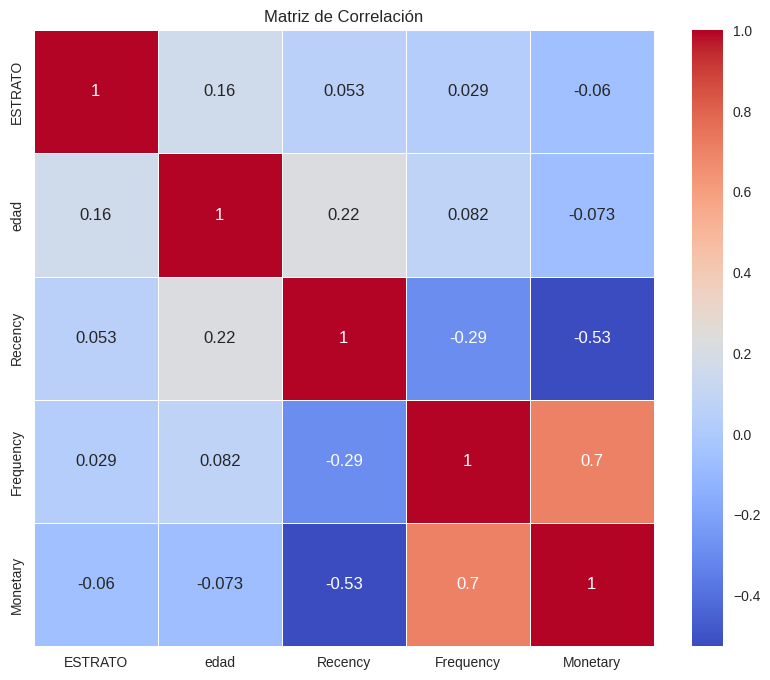

In [9]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(columns="Identificacion")
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


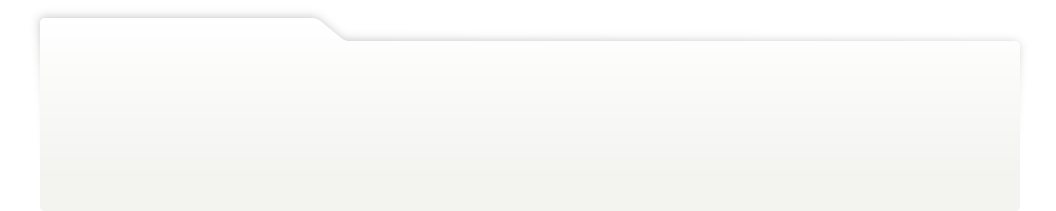
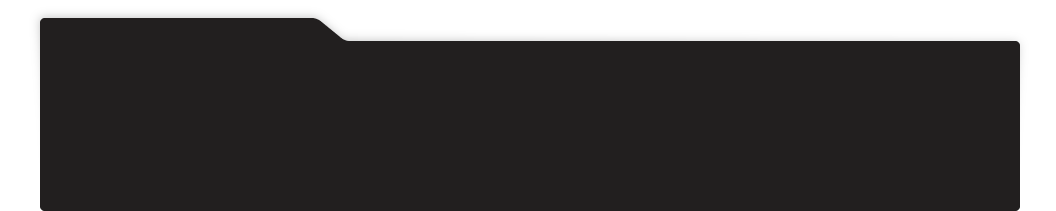
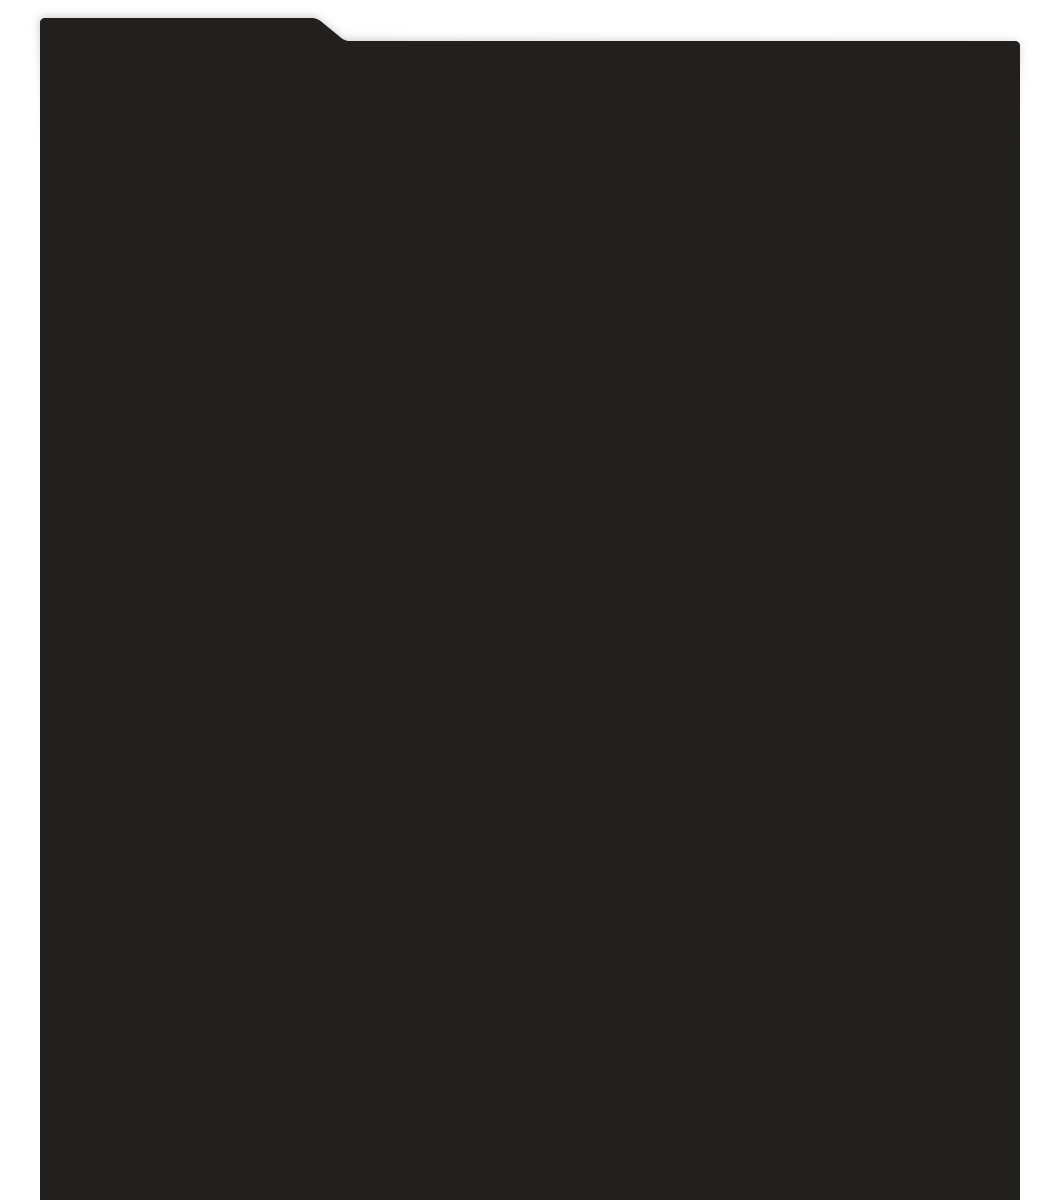
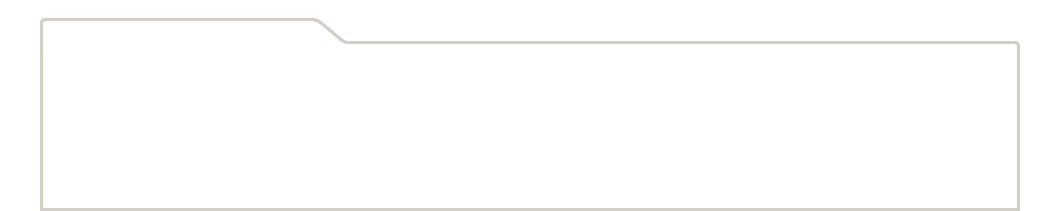
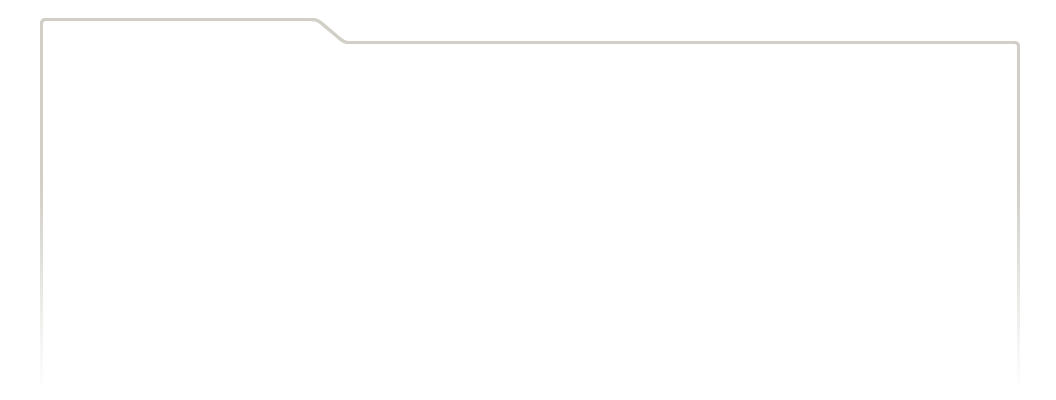
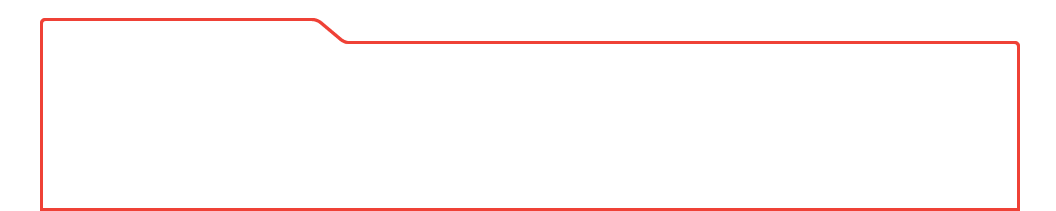
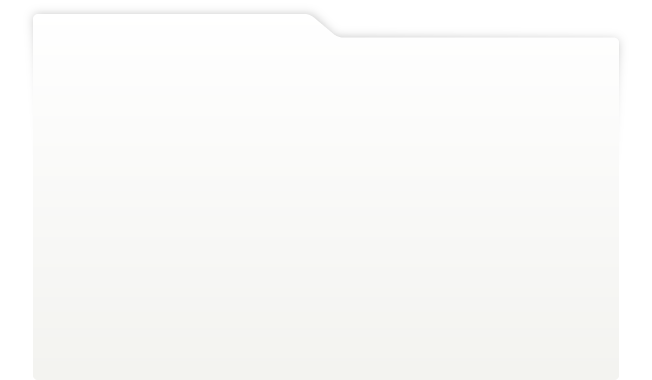
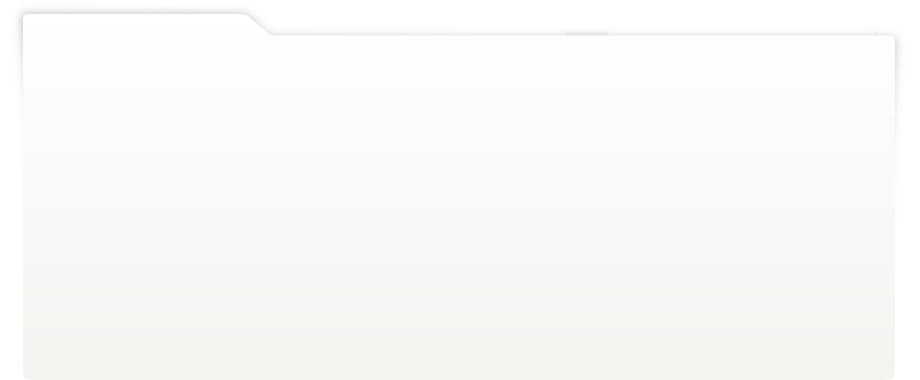
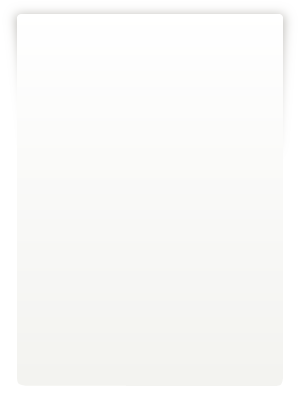
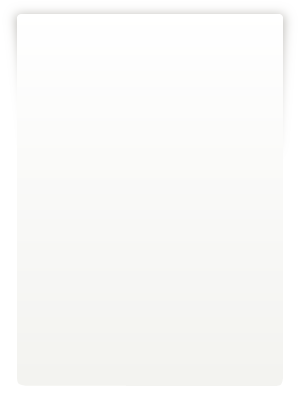
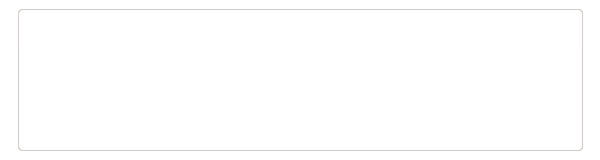
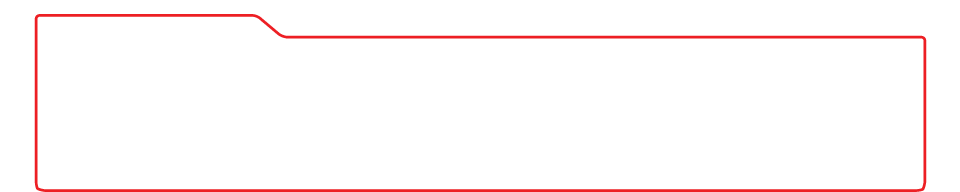
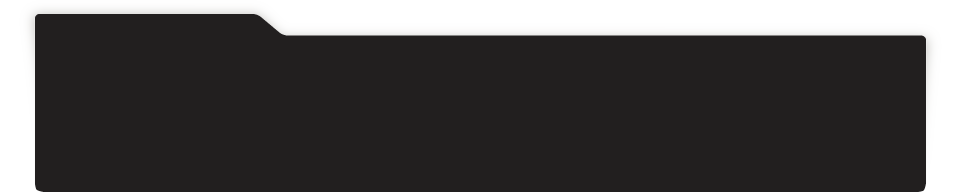
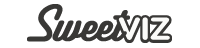
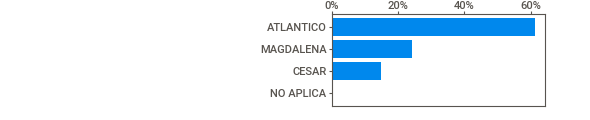
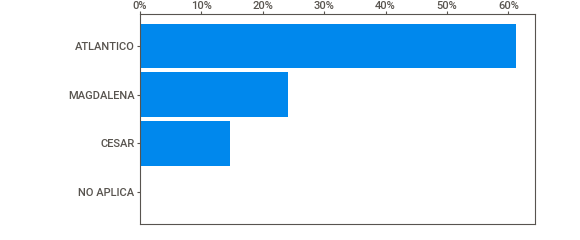
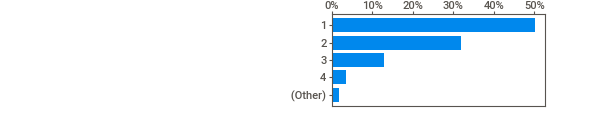
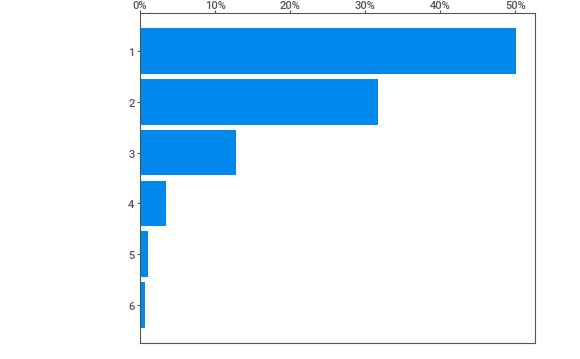
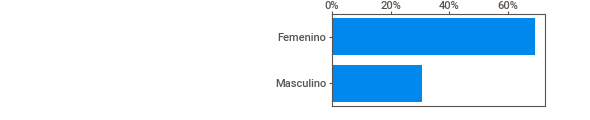
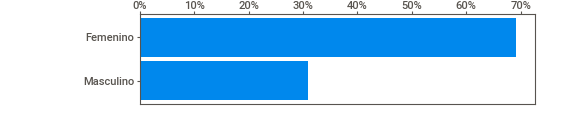
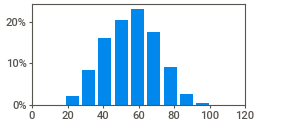
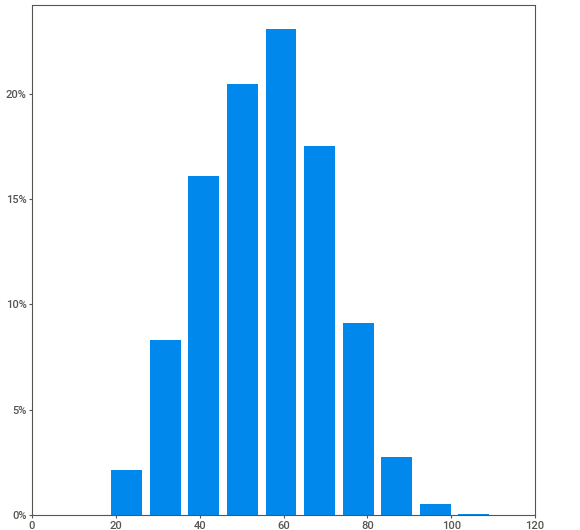
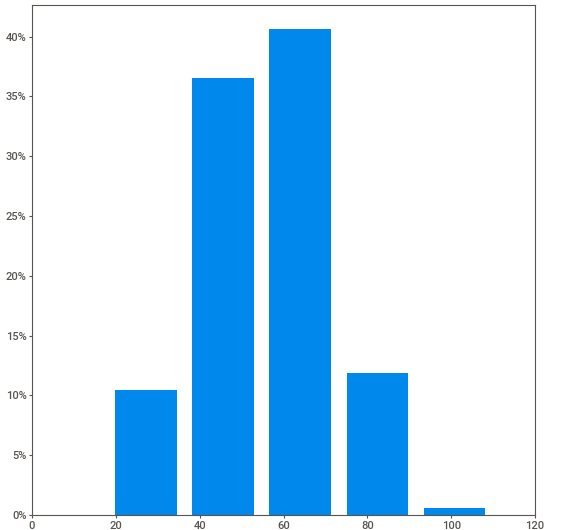
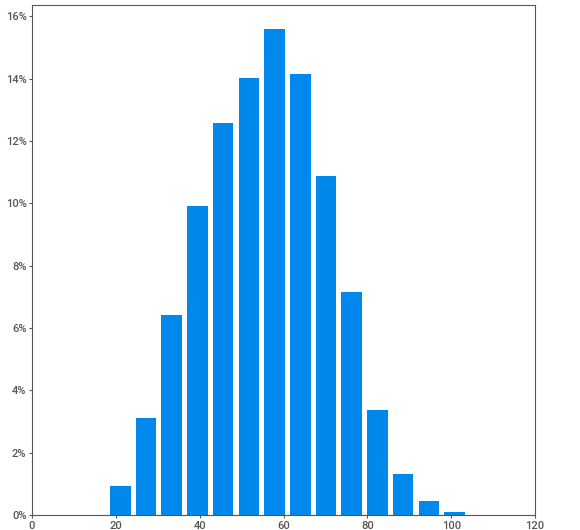
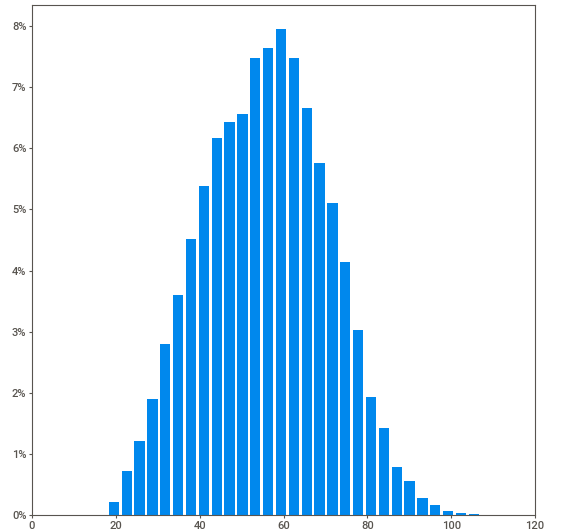
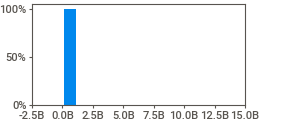
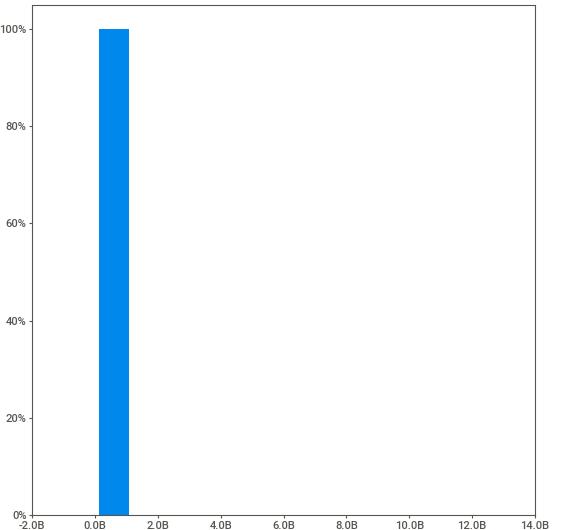
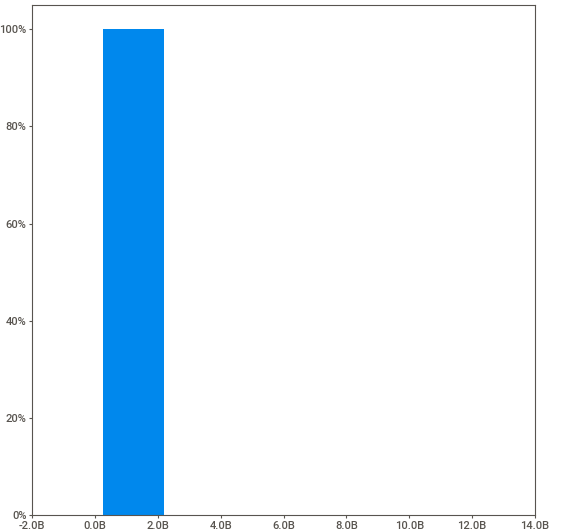
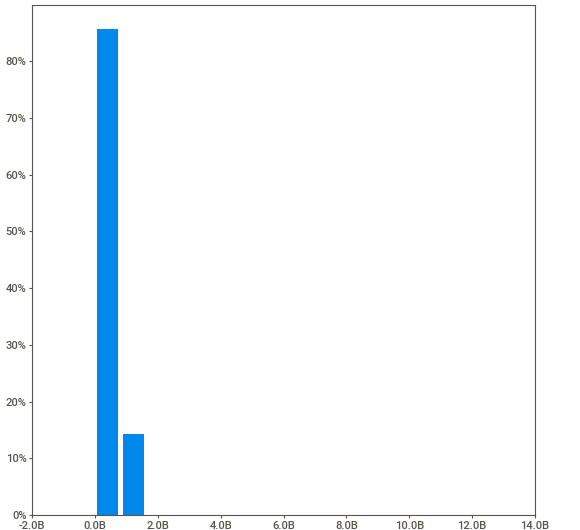
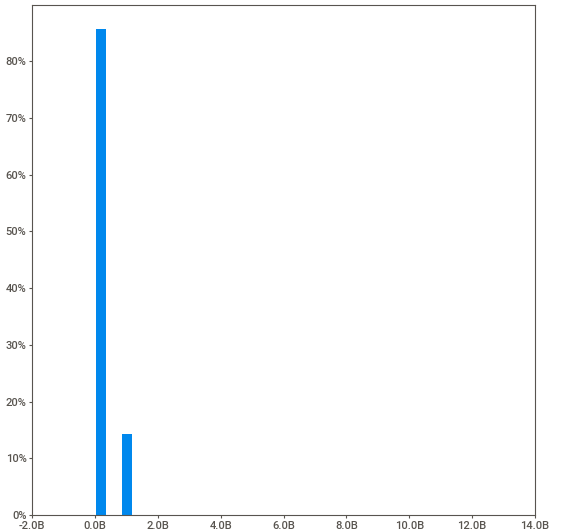
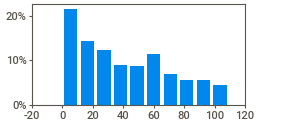
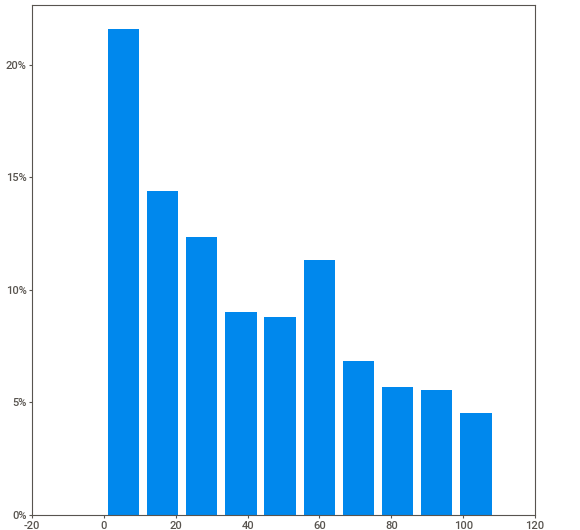
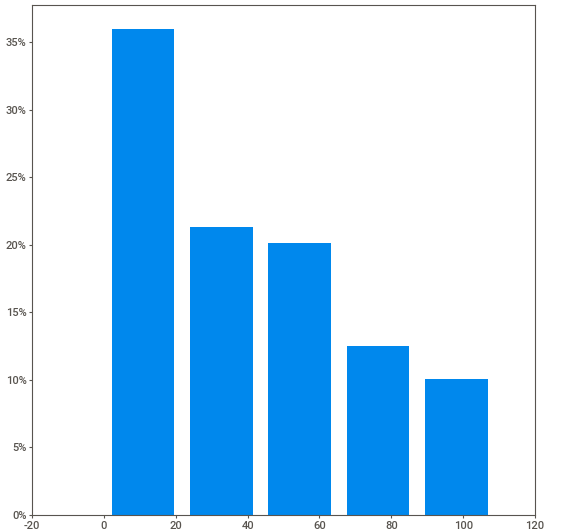
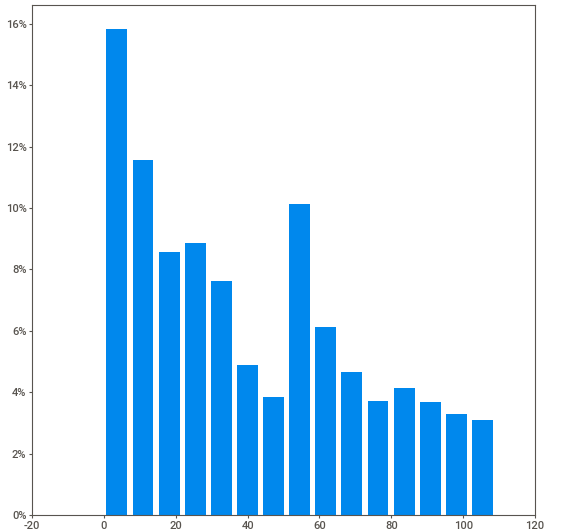
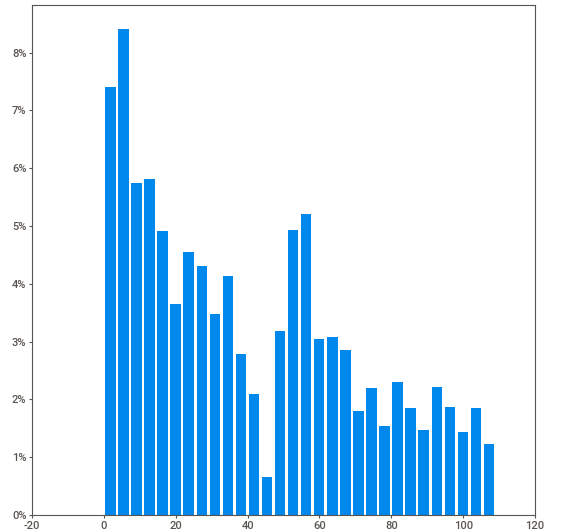
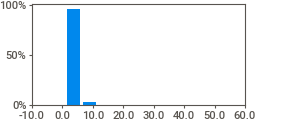
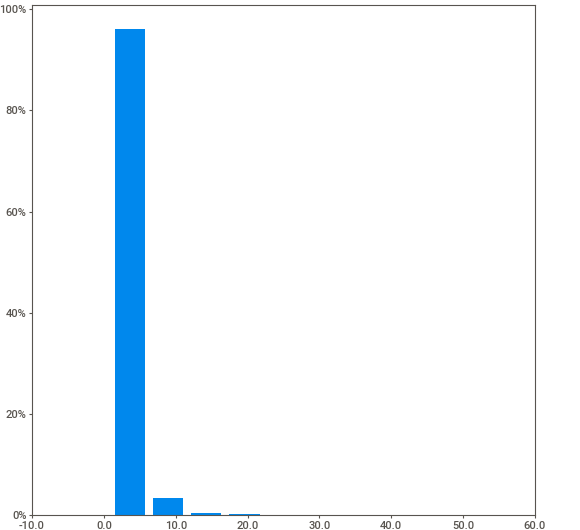
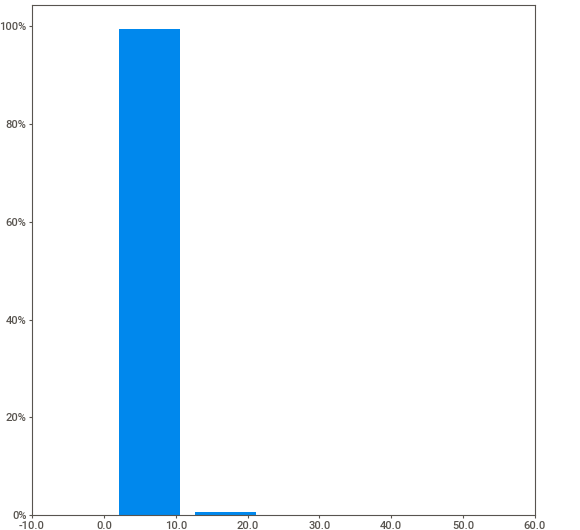
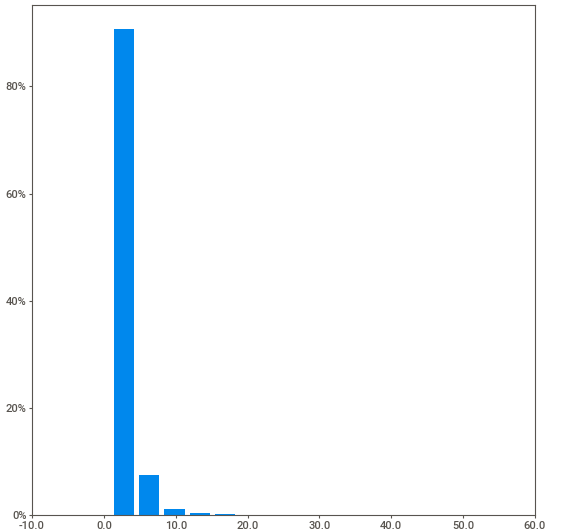
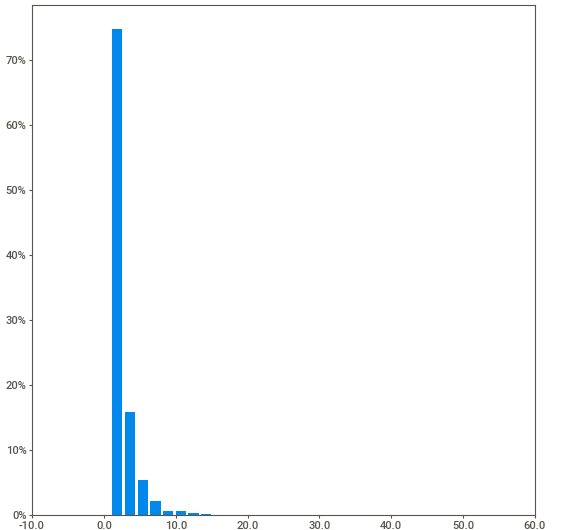
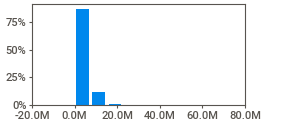
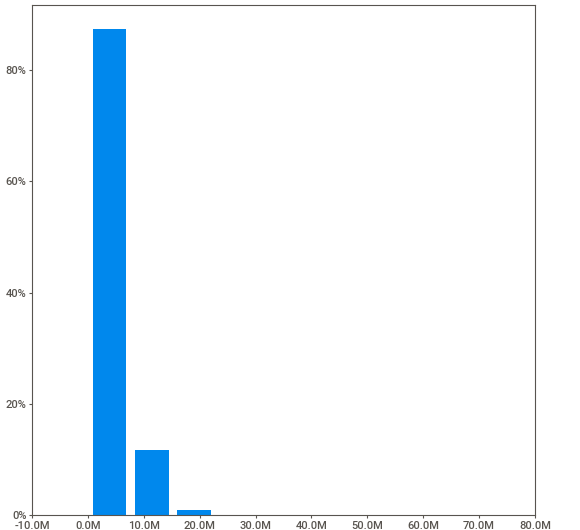
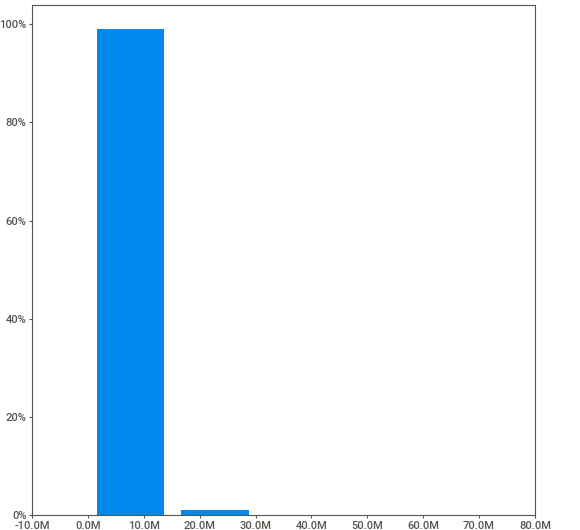
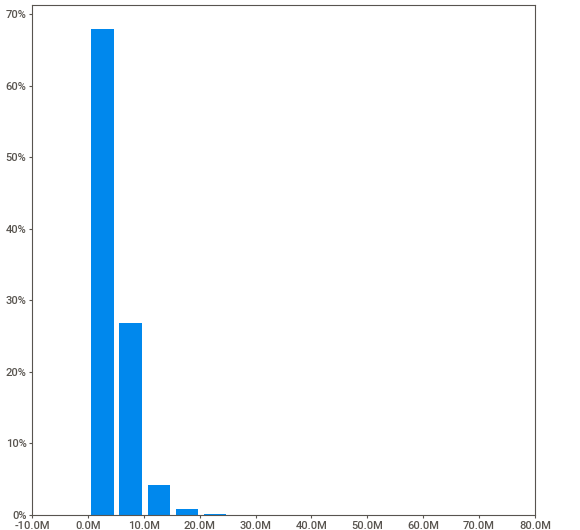
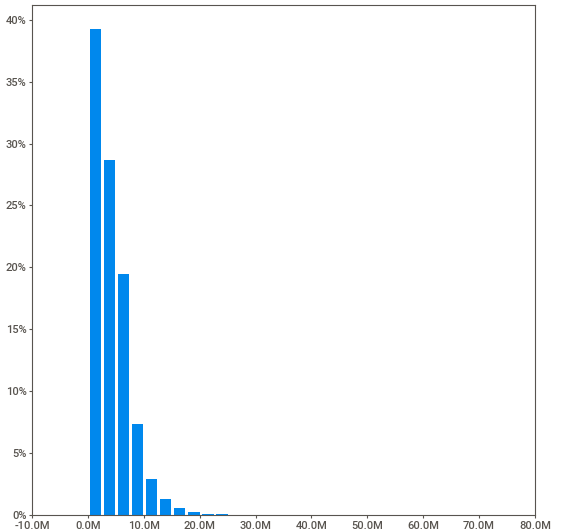
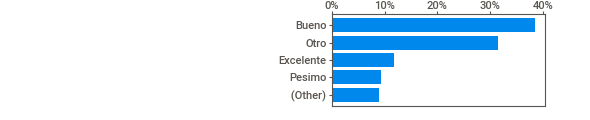
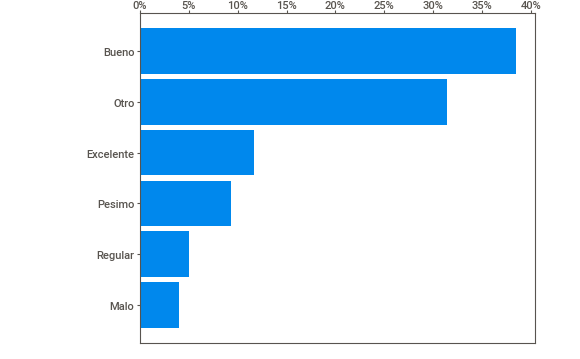
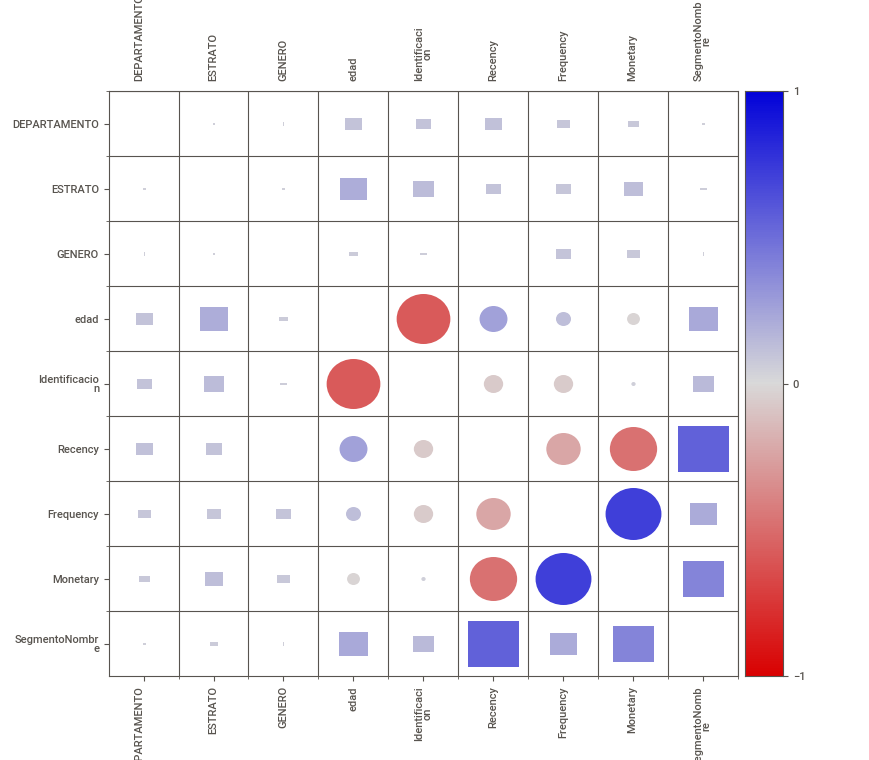
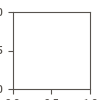

In [10]:
svdf =sv.analyze(df)
svdf.show_notebook()

Realizamos un análisis a las variables del Dataframe:
**Edad**: Se puede verificar el promedio de los usuarios que compran, teniendo un media de 56 años, podemeos observar datos atípicos como la edad máxima de 124 años.
**Estrato**: La gran mayoría de usuarios se concentra en los estratos 1 y 2.
**Recency**: Tengo una Recencia entre 0 y 103 agrupandose en 20 - 40.
**Frecuency**: Se agrupan entre 1 - 4, teniendo datos atípicos fuera de la media.
**Monetario**: Se agrupan entre 2M - 4M, teniendo datos atípicos fuera de la media.

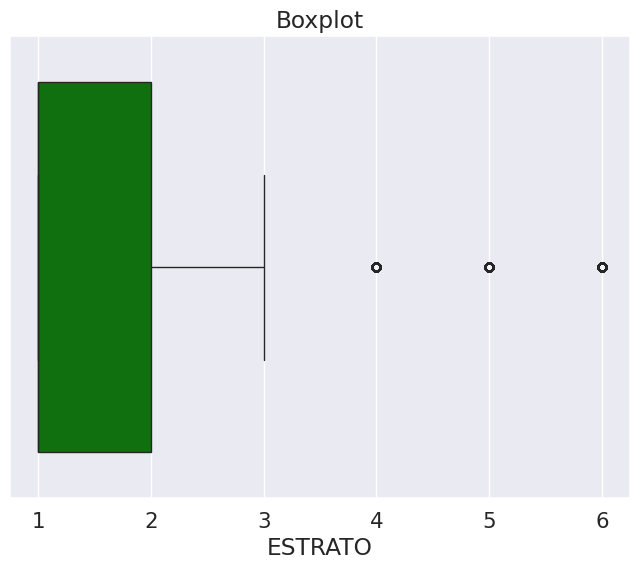

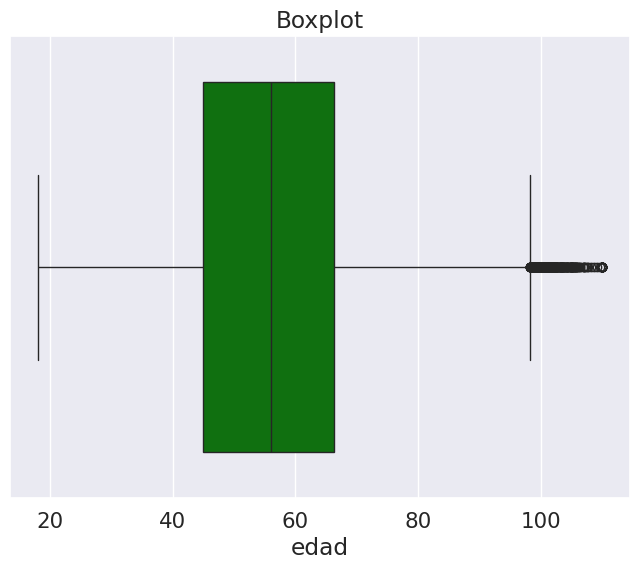

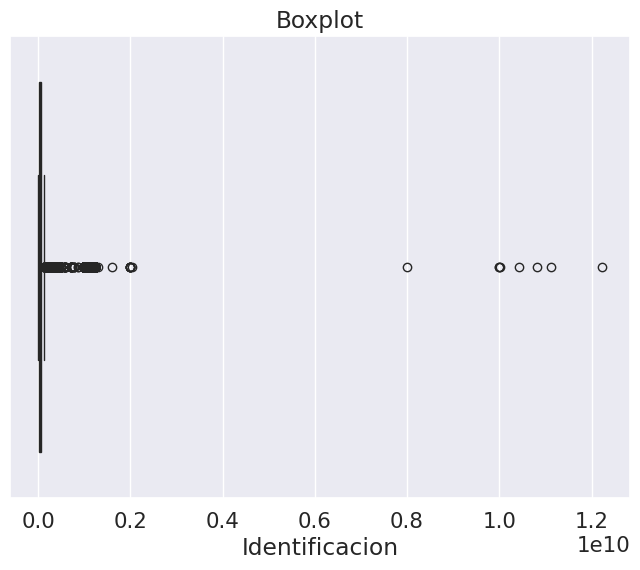

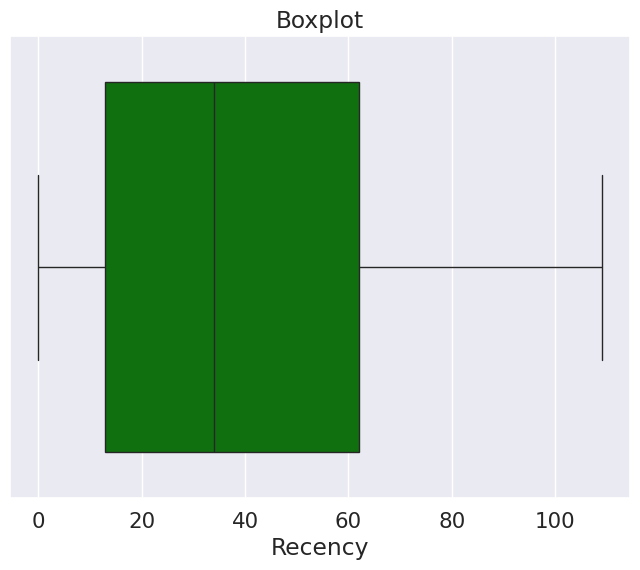

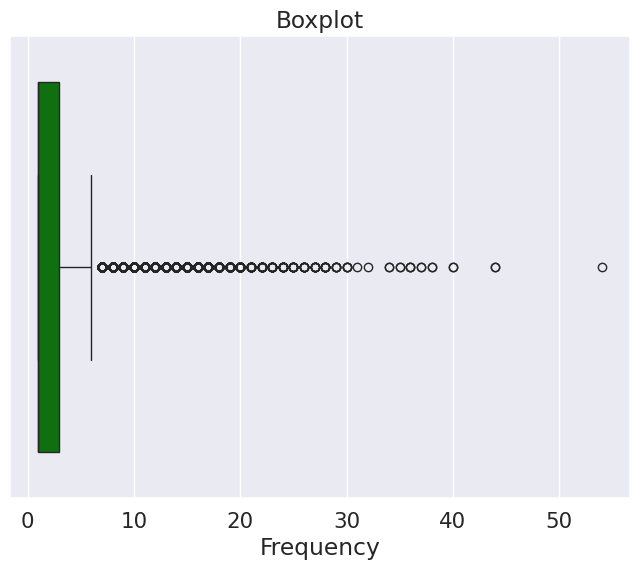

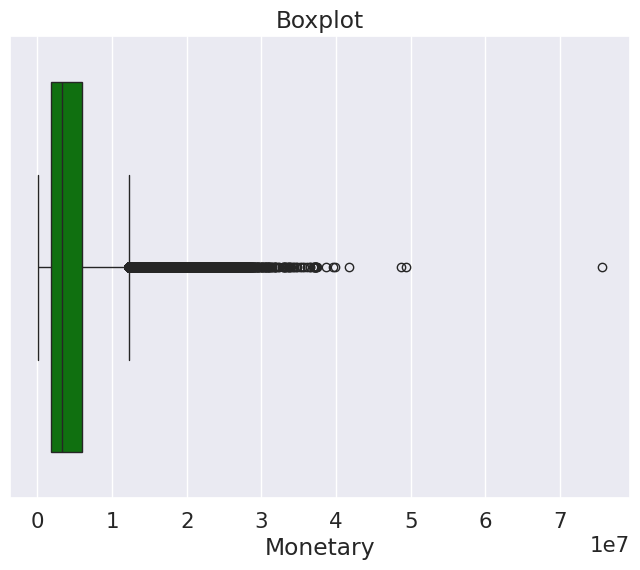

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.set(font_scale=1.4)

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title('Boxplot')
    plt.show()

Se analiza la distribución de usuarios por Departamento, obteniendo la mayor cantidad de usuarios en Atlántico.

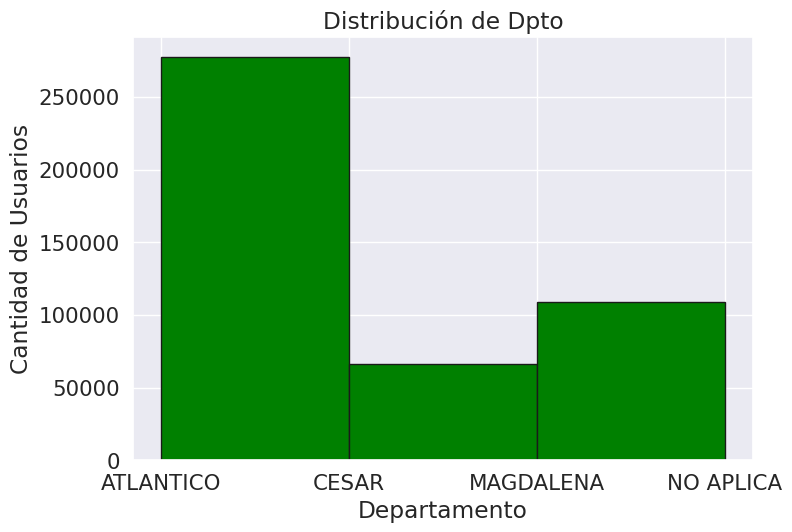

In [12]:
dfrecuencia = df['DEPARTAMENTO']
plt.hist(dfrecuencia, bins=3, edgecolor='k',color='green')

plt.xlabel('Departamento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Dpto')

plt.show()


La distribución de usuarios por edad, se observa que se concentran en edades adultas entre 40 - 60 años.

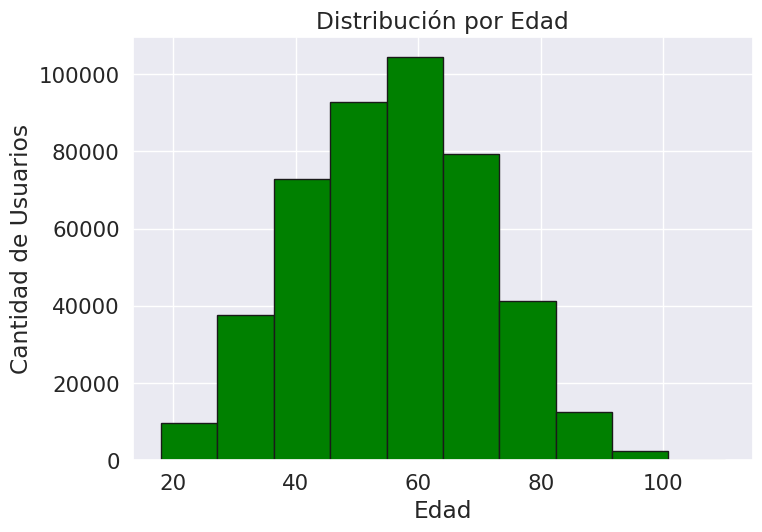

In [13]:
efrecuencia = df['edad']
plt.hist(efrecuencia, bins=10, edgecolor='k', color='green')

plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución por Edad')

plt.show()

La distribción por género, se identifica una concentración en el género **Femenino**

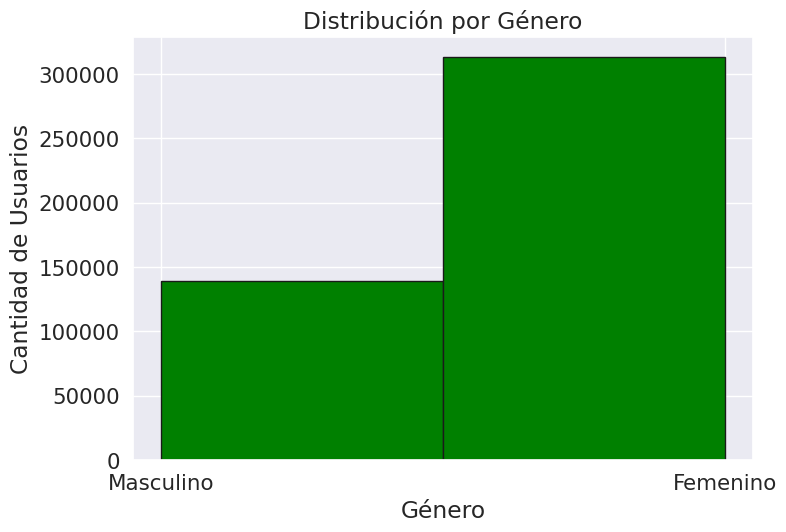

In [14]:
gfrecuencia = df['GENERO']
plt.hist(gfrecuencia, bins=2, edgecolor='k', color='green')

plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución por Género')

plt.show()

Como mencionaba anteriormente, por estrato tenemos una concentración en los estratos 1 y 2.

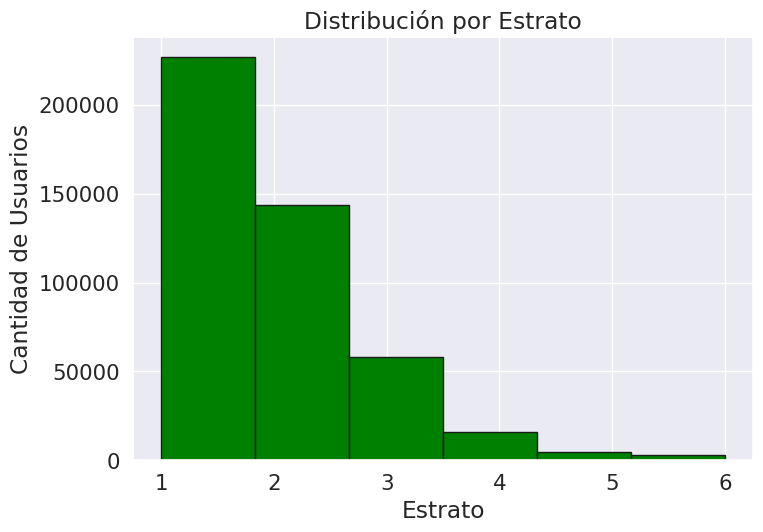

In [15]:
efrecuencia = df['ESTRATO']
plt.hist(efrecuencia, bins=6, edgecolor='k', color='green')

plt.xlabel('Estrato')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución por Estrato')

plt.show()

La distribución de usuarios por Recency, tenemos una distibución asimétrica a la izquierda. Se concentra la mayor cantidad de usuarios en Recency entre 0 - 2. Se divide el grupo de datos en dos: Los que tienen menos de 48 meses activos y los que tienen más de 48 meses sin comprar que denominaremos Inactivos.

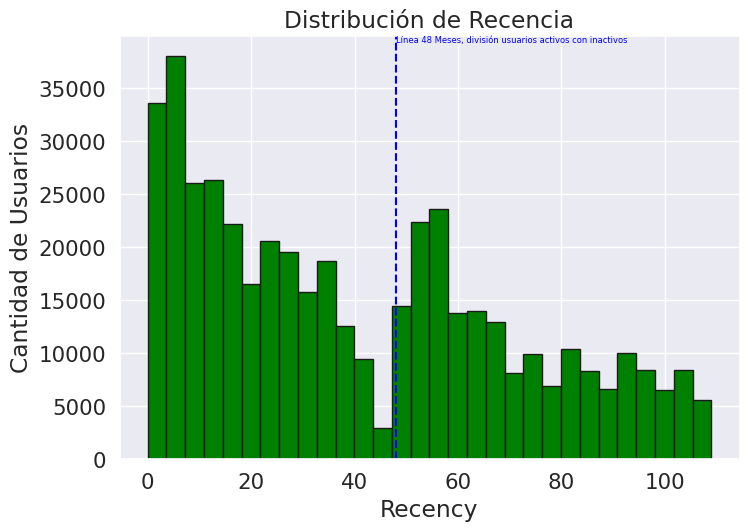

In [16]:
rfrecuencia = df['Recency']
plt.hist(rfrecuencia, bins=30, edgecolor='k', color='green')
plt.axvline(x=48, color='blue', linestyle='--', label='Separador: Recency < 48')

plt.xlabel('Recency')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Recencia')
plt.text(48, plt.ylim()[1], 'Línea 48 Meses, división usuarios activos con inactivos', color='blue', fontsize=6, va='top', ha='left')

plt.show()

Distirbución de Clientes por Frequency, tenemos una distribución asimétrica hacia la izquierda. Con datos concentrados entre 2 - 5.

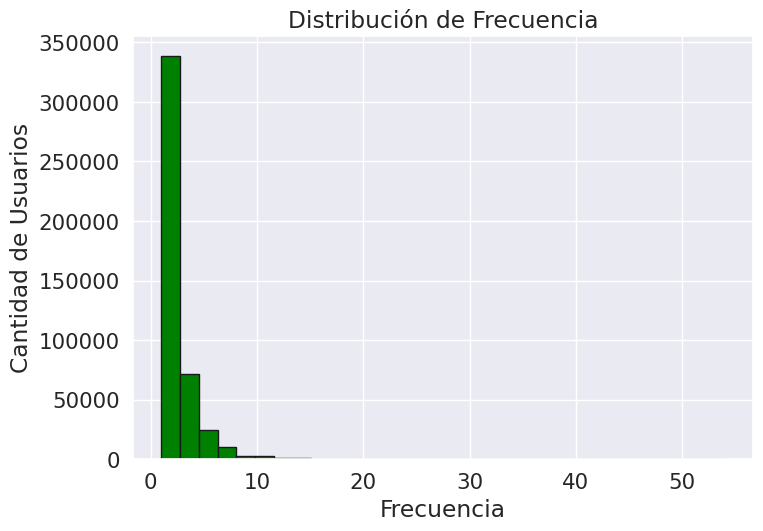

In [17]:
ffrecuencia = df['Frequency']
plt.hist(ffrecuencia, bins=30, edgecolor='k', color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Frecuencia')

plt.show()

Al igual que el gráfico anterior, tenemos una distribución asimétrica hacia la izquierda.

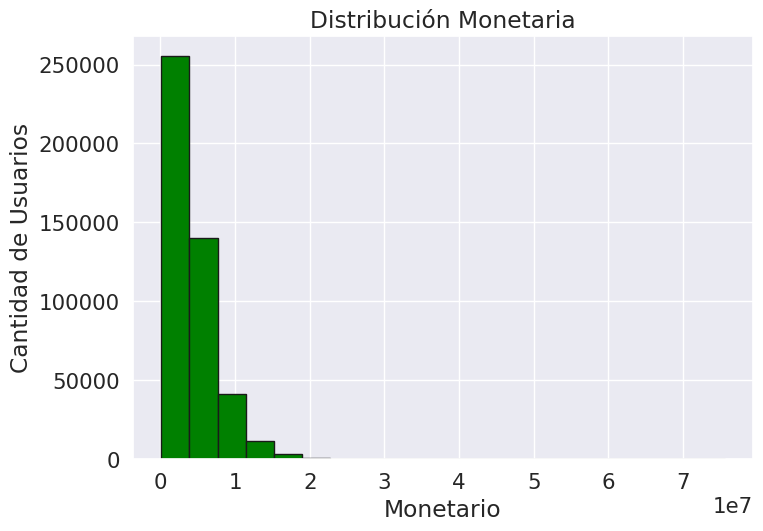

In [18]:
mfrecuencia = df['Monetary']
plt.hist(mfrecuencia, bins=20, edgecolor='k', color='green')

plt.xlabel('Monetario')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución Monetaria')

plt.show()

**Análisis Bivariado**
Con el análisis bivariado podemos comprender cómo se relacionan las variables entre sí y la relación entre las variables independientes presentes en el conjunto de datos  y para identificar patrones de tendencia lineal.

Gráfico de dispersión (scatter plot): La parte principal del gráfico es un conjunto de puntos dispersos en un plano cartesiano. Cada punto representa un par de valores de dos variables diferentes que estás comparando.

Línea de regresión: La línea que atraviesa los puntos en el gráfico es la línea de regresión. Esta línea se ajusta a los datos de manera que represente la mejor estimación de la relación entre las dos variables. En un gráfico de dispersión, la línea de regresión se utiliza para modelar una posible tendencia lineal en los datos.

Dirección de la línea de regresión: La dirección de la línea de regresión indica si hay una relación positiva o negativa entre las dos variables. Si la línea sube hacia la derecha, hay una correlación positiva, lo que significa que cuando una variable aumenta, la otra también tiende a aumentar. Si la línea desciende hacia la derecha, hay una correlación negativa, lo que significa que cuando una variable aumenta, la otra tiende a disminuir.

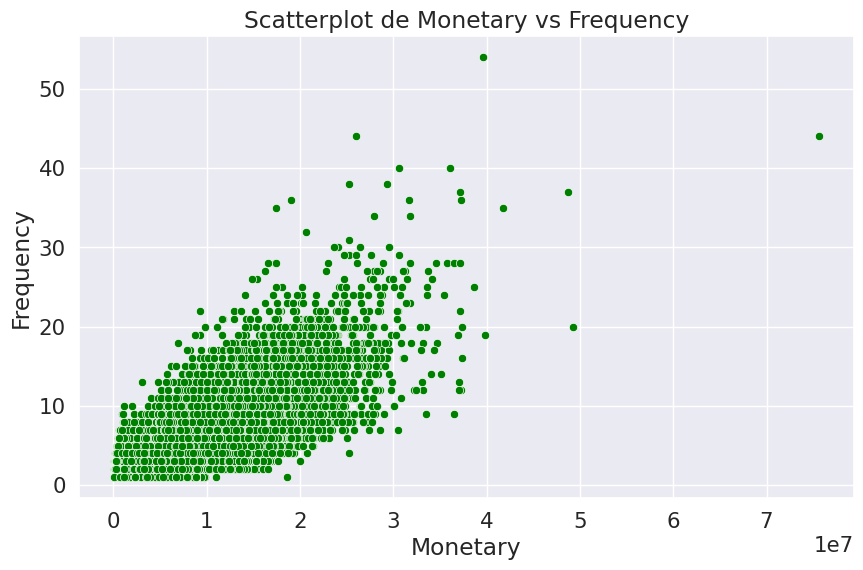

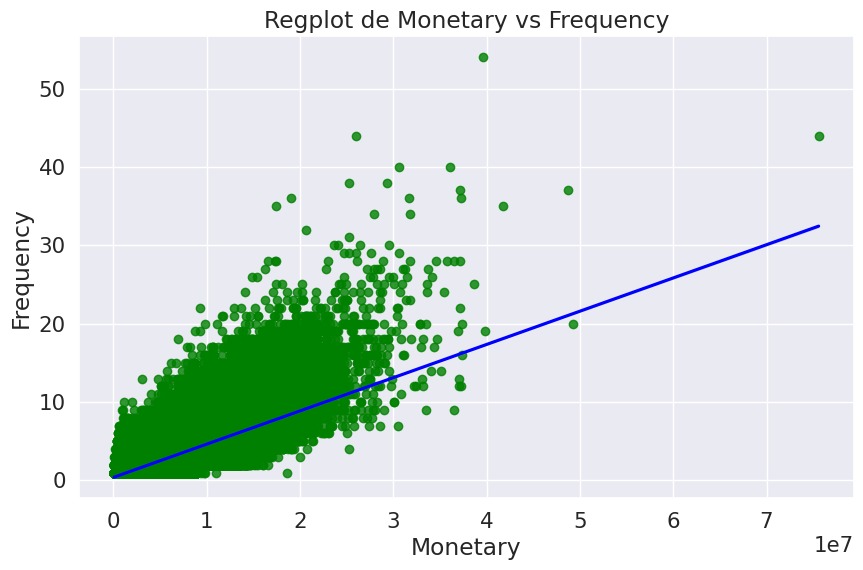

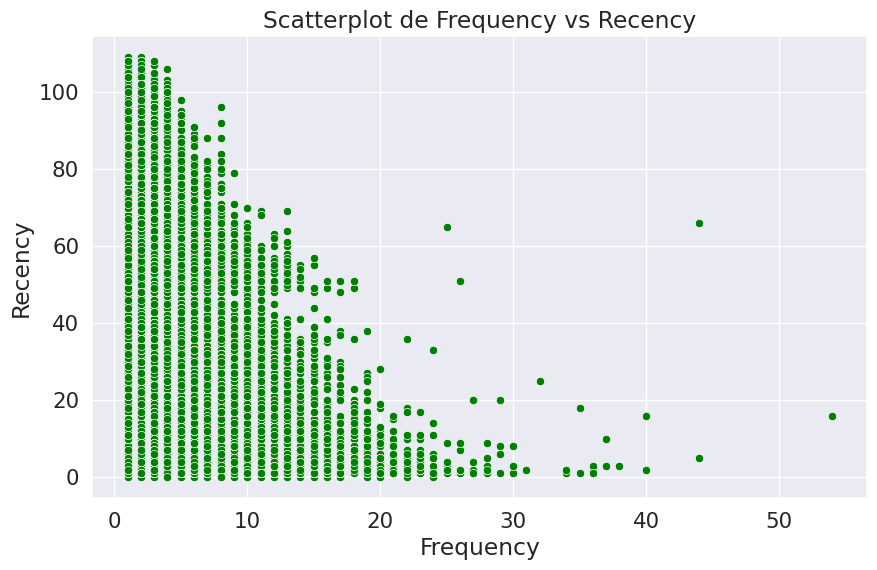

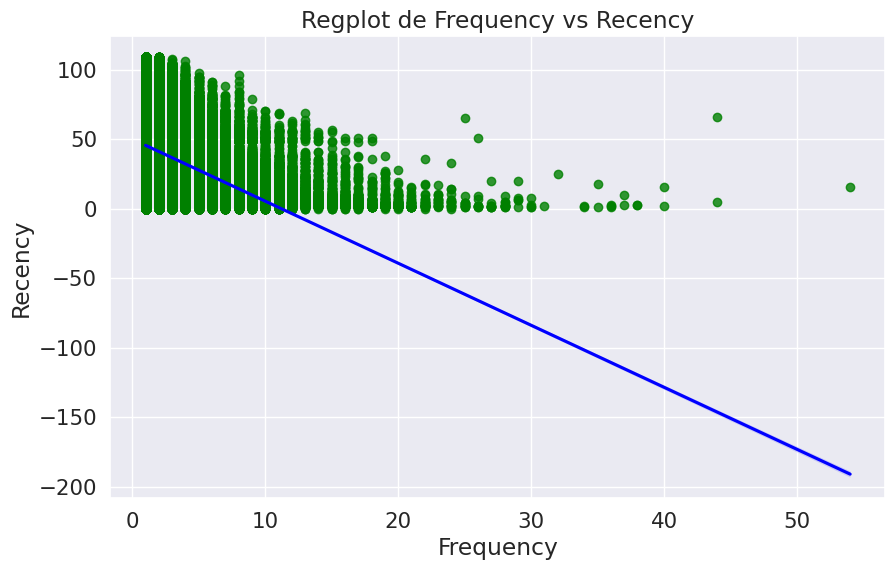

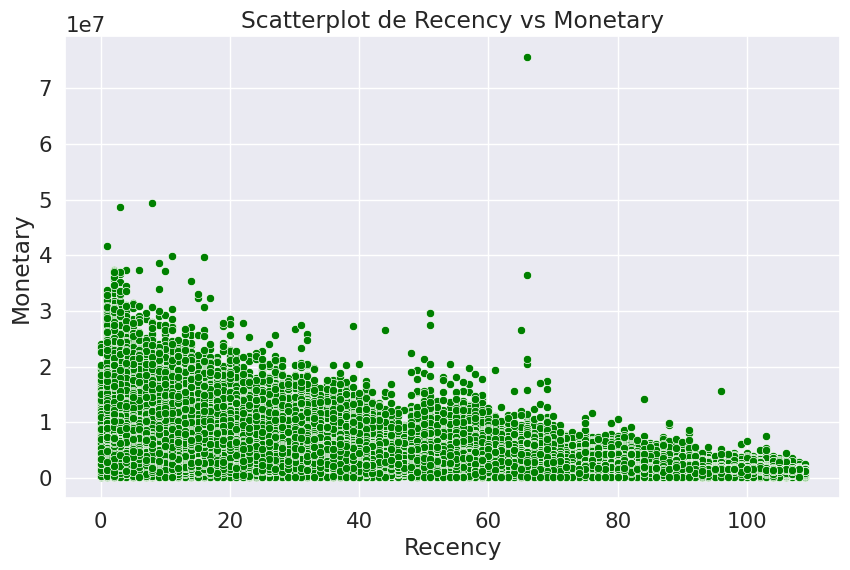

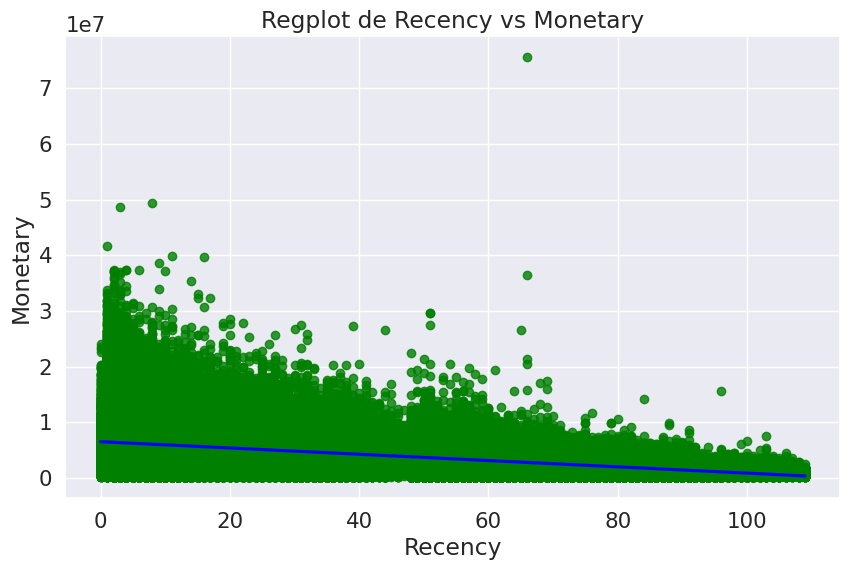

In [19]:
bivar = [('Monetary', 'Frequency'), ('Frequency','Recency'),('Recency','Monetary')]

for pair in bivar:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1], color='green')
    plt.title(f'Scatterplot de {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=pair[0], y=pair[1], color= 'green', line_kws={"color":"blue"})
    plt.title(f'Regplot de {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

## Transformación de Datos

Se procede con la trasformación del Segmento de Cartera de categorica a Numérica.

In [20]:
object_cols = ['SegmentoNombre']
object_cols = ['SegmentoNombre']
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
df = df.copy()
df

,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre
0,ATLANTICO,BARRANQUILLA,6,Masculino,95.989048,2.088800e+04,76,2,204000,3
1,ATLANTICO,BARRANQUILLA,5,Masculino,70.866529,2.522000e+04,98,1,1443498,3
2,CESAR,VALLEDUPAR,6,Femenino,96.799452,3.190300e+04,103,1,1555569,3
3,ATLANTICO,BARRANQUILLA,6,Masculino,96.068446,3.579600e+04,88,2,251999,3
4,ATLANTICO,BARRANQUILLA,2,Masculino,92.380561,3.599300e+04,11,1,152900,1
...,...,...,...,...,...,...,...,...,...,...
452758,ATLANTICO,MALAMBO,1,Masculino,36.167008,1.042427e+10,51,1,3469997,3
452759,MAGDALENA,SABANAS(PIÑON),1,Masculino,35.718001,1.081476e+10,51,1,2370000,0
452760,ATLANTICO,GALAPA,1,Femenino,39.085557,1.112953e+10,59,1,1156177,3
452761,MAGDALENA,CIENAGA (MAG),1,Femenino,28.191649,1.222197e+10,57,1,3600970,0


Dividimos el conjunto de datos en dos partes:
- Usuarios Activos: Aquellos que tienen una Recencia menor o igual a 48 meses.
- Usuarios Inactivos: Aquellos con una Recencia mayor a 48 meses.

Esta distribución es importante porque vamos a analizar la segmentación de los usuarios Activos, ya que los Inactivos son considerados un segmento más y para poder identificarlos no es necesario ejecutar un modelo.

In [21]:
df_activos = df[df['Recency'] <= 48]
df_inactivos = df[df['Recency'] > 48]

Se resetean los índices de ambos dataframe:

In [22]:
df_activos = pd.DataFrame(df_activos).reset_index()
df_activos=df_activos.drop('index', axis=1)
df_activos.head(5)

,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre
0,ATLANTICO,BARRANQUILLA,2,Masculino,92.380561,35993.0,11,1,152900,1
1,CESAR,VALLEDUPAR,5,Femenino,92.317590,84984.0,22,3,476300,3
2,ATLANTICO,BARRANQUILLA,5,Masculino,90.735112,120698.0,34,3,420000,3
3,CESAR,VALLEDUPAR,3,Masculino,90.190280,130168.0,39,3,476300,3
4,ATLANTICO,SOLEDAD,2,Masculino,89.746748,130956.0,11,1,288900,0


In [23]:
df_inactivos = pd.DataFrame(df_inactivos).reset_index()
df_inactivos=df_inactivos.drop('index', axis=1)
df_inactivos.head(5)

,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre
0,ATLANTICO,BARRANQUILLA,6,Masculino,95.989048,20888.0,76,2,204000,3
1,ATLANTICO,BARRANQUILLA,5,Masculino,70.866529,25220.0,98,1,1443498,3
2,CESAR,VALLEDUPAR,6,Femenino,96.799452,31903.0,103,1,1555569,3
3,ATLANTICO,BARRANQUILLA,6,Masculino,96.068446,35796.0,88,2,251999,3
4,ATLANTICO,BARRANQUILLA,4,Masculino,87.682409,37332.0,85,1,122000,3


## Escalamiento de Variables

Procedemos a escalar las variables relevantes para el modelo, los métodos de escalamiento en clustering son una buena práctica para mejorar la efectividad del algoritmo, reducir el sesgo por escala y facilitar la interpretación de los resultados. Esto es especialmente importante en algoritmos como K-Means, donde la distancia entre puntos es un factor clave en la agrupación de datos.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_norm = df_activos[['Recency', 'Frequency', 'Monetary', 'SegmentoNombre']]
rfm_norm = scaler.fit_transform(rfm_norm)
df_rfm = pd.DataFrame(rfm_norm)

In [25]:
df_rfm

,0,1,2,3
0,-0.568477,-0.661678,-1.524115,-0.231305
1,0.289233,0.193824,-1.431862,0.938440
2,1.224916,0.193824,-1.447922,0.938440
3,1.614785,0.193824,-1.431862,0.938440
4,-0.568477,-0.661678,-1.485320,-0.816178
...,...,...,...,...
266181,-0.880372,-0.661678,0.367866,-0.816178
266182,-1.270240,-0.661678,0.469019,2.108186
266183,-0.412530,-0.661678,0.675604,-0.816178
266184,-0.334556,-0.661678,0.349210,1.523313


Con los datos escalados, se procede a crear y entrenar el Modelo K-means para el conjunto de datos de **Usuarios Activos**.

## K-MEANS - Modelo No Supervisado

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. Sin embargo, se utilizarán técnicas de clasificación supervisada como KNN, árboles de decisión y Random Forest.

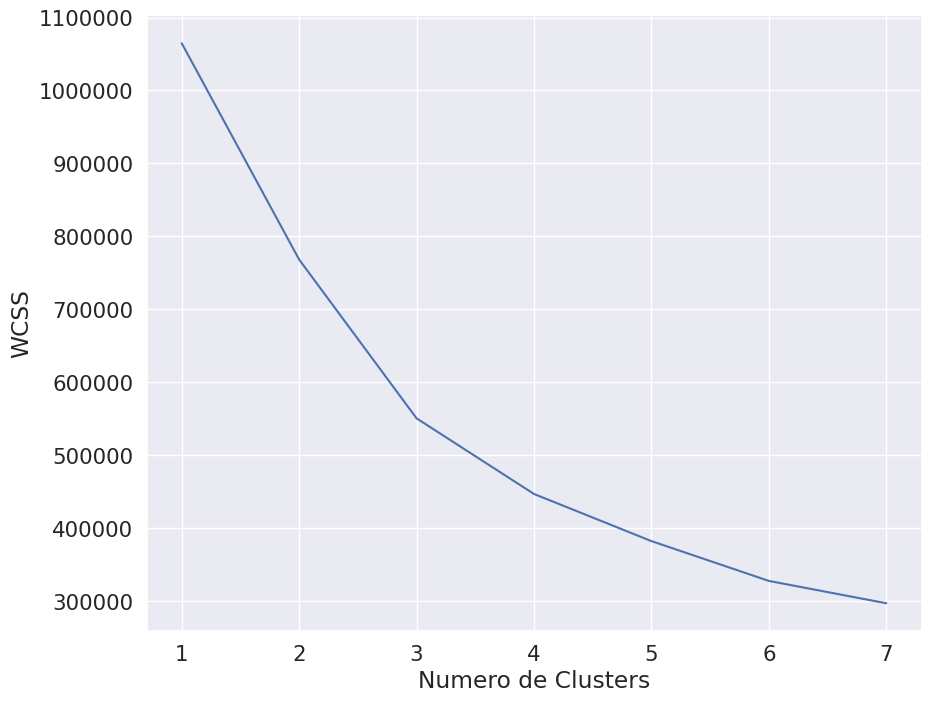

In [26]:
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i,init="k-means++")
  kmeans.fit(df_rfm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,8),wcss)
plt.ylabel("WCSS")
plt.xlabel("Numero de Clusters")
plt.show()

Calculamos el número de Clusters teniendo en cuenta el método WCSS, esta una métrica utilizada en clustering, especialmente en algoritmos como K-Means, para evaluar la cohesión de los clusters. Es una medida que intenta cuantificar qué tan compactos y cohesivos son los clusters. Evaluando el gráfico el Número óptimo de Clusters es K=4.

In [27]:
kmeans_cluster = KMeans(n_clusters=4,random_state=42)
modelo=kmeans_cluster.fit(df_rfm)

Se evalúa el modelo y se obtienen los clusters:

In [28]:
df_rfm['Cluster'] = modelo.labels_
df_rfm

,0,1,2,3,Cluster
0,-0.568477,-0.661678,-1.524115,-0.231305,3
1,0.289233,0.193824,-1.431862,0.938440,0
2,1.224916,0.193824,-1.447922,0.938440,0
3,1.614785,0.193824,-1.431862,0.938440,0
4,-0.568477,-0.661678,-1.485320,-0.816178,3
...,...,...,...,...,...
266181,-0.880372,-0.661678,0.367866,-0.816178,3
266182,-1.270240,-0.661678,0.469019,2.108186,1
266183,-0.412530,-0.661678,0.675604,-0.816178,3
266184,-0.334556,-0.661678,0.349210,1.523313,1


Evalúamos la calidad de los clusters obtenidos con la métrica Silhoutte Score. Esta métrica nos ayuda a identificar si hay similitud entre un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación).

In [29]:
silhouette_score(df_rfm,modelo.labels_)

0.45916954419139344

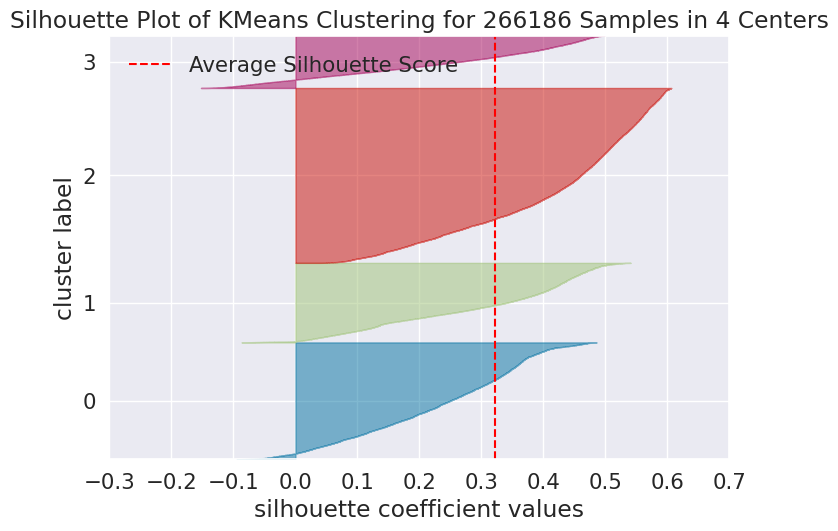

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 266186 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [30]:
# CHECK

from yellowbrick.cluster import silhouette_visualizer
df_rfm2 = df_rfm.drop('Cluster',axis=1)
silhouette_visualizer(KMeans(4),df_rfm2,colors="yellowbrick")

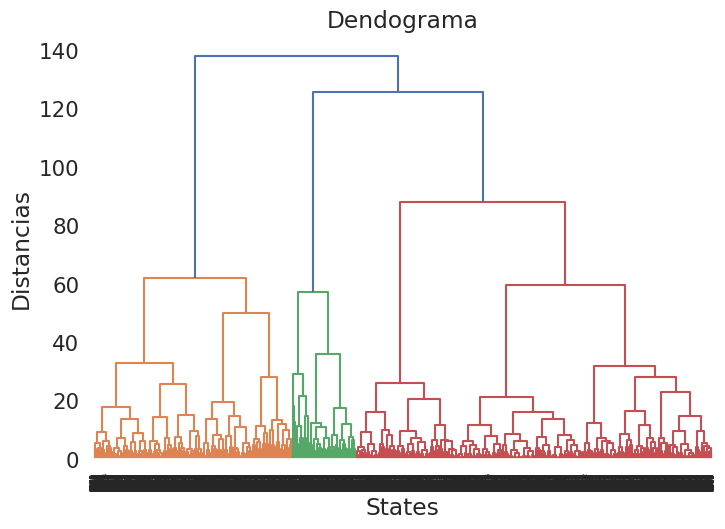

In [31]:
df_rfm2 = df_rfm2.sample(n=10000, random_state=42)

import scipy.cluster.hierarchy as sch
dendograma=sch.dendrogram(sch.linkage(df_rfm2,method="ward"))

plt.title("Dendograma")
plt.xlabel("States")
plt.ylabel("Distancias")
plt.show()

Como se mencionó al inicio, el modelo K-Means es ideal para agrupar los datos en clusters pero no asigna etiquetas. En este caso, procederemos a asignar manualmente una categoría a cada uno de los segmentos con el fin de evaluar más adelante modelos supervisados que nos puedan entregar las etiquetas y así poder comparar.

In [32]:
def asignaretiqueta(Cluster):
    if Cluster == 0:
        return "Nuevo"
    elif Cluster == 1:
        return "Bronce"
    elif Cluster == 2:
        return "Plata"
    elif Cluster == 3:
        return "Diamante"

df_activos['Cluster'] = df_rfm['Cluster'].apply(asignaretiqueta)
df_activos

,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre,Cluster
0,ATLANTICO,BARRANQUILLA,2,Masculino,92.380561,3.599300e+04,11,1,152900,1,Diamante
1,CESAR,VALLEDUPAR,5,Femenino,92.317590,8.498400e+04,22,3,476300,3,Nuevo
2,ATLANTICO,BARRANQUILLA,5,Masculino,90.735112,1.206980e+05,34,3,420000,3,Nuevo
3,CESAR,VALLEDUPAR,3,Masculino,90.190280,1.301680e+05,39,3,476300,3,Nuevo
4,ATLANTICO,SOLEDAD,2,Masculino,89.746748,1.309560e+05,11,1,288900,0,Diamante
...,...,...,...,...,...,...,...,...,...,...,...
266181,MAGDALENA,CIENAGA (MAG),2,Femenino,39.386721,2.000003e+09,7,1,6785400,0,Diamante
266182,MAGDALENA,CASA DE TABLAS(SN ANGEL)MAG,1,Femenino,52.629705,2.000005e+09,2,1,7140000,5,Bronce
266183,MAGDALENA,SANTA MARTA (MAG),2,Masculino,41.002053,2.000010e+09,13,1,7864200,0,Diamante
266184,MAGDALENA,PLATO (MAG),2,Masculino,25.086926,2.000011e+09,14,1,6719998,4,Bronce


El conjunto de Datos de Usuarios Inactivos no se procesa bajo el modelo de K-Means porque este grupo de usuarios ya es considerado un Cluster. Se Prodece a modificar el dataframe, agregando manualmente las columnas Cluster y Segmento con el fin de poder unificar este dataframe con el de usuarios Activos.

In [33]:
df_inactivos['Cluster'] = 'Inactivo'

Consolidamos ambos Datasets con el cluster asignado:

In [34]:
df = pd.concat([df_activos, df_inactivos], axis=0, ignore_index=True)
df

,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre,Cluster
0,ATLANTICO,BARRANQUILLA,2,Masculino,92.380561,3.599300e+04,11,1,152900,1,Diamante
1,CESAR,VALLEDUPAR,5,Femenino,92.317590,8.498400e+04,22,3,476300,3,Nuevo
2,ATLANTICO,BARRANQUILLA,5,Masculino,90.735112,1.206980e+05,34,3,420000,3,Nuevo
3,CESAR,VALLEDUPAR,3,Masculino,90.190280,1.301680e+05,39,3,476300,3,Nuevo
4,ATLANTICO,SOLEDAD,2,Masculino,89.746748,1.309560e+05,11,1,288900,0,Diamante
...,...,...,...,...,...,...,...,...,...,...,...
452758,ATLANTICO,MALAMBO,1,Masculino,36.167008,1.042427e+10,51,1,3469997,3,Inactivo
452759,MAGDALENA,SABANAS(PIÑON),1,Masculino,35.718001,1.081476e+10,51,1,2370000,0,Inactivo
452760,ATLANTICO,GALAPA,1,Femenino,39.085557,1.112953e+10,59,1,1156177,3,Inactivo
452761,MAGDALENA,CIENAGA (MAG),1,Femenino,28.191649,1.222197e+10,57,1,3600970,0,Inactivo


A continuación procedemos con la visualización de los Clusters creados por el modelo. Se crea un gráfico en 3D donde se pueden evidenciar claramente cada uno de los clusters creados. Tenemos 4 para este ejercicio, identificados con color azul, amarillo, morado y verde.

Obtenemos la siguiente distribución de usuarios por segmento, donde se evidencia que los Usuarios inactivos tienen una distribución mucho mayor. Esto es clave para que el área de mercadeo implemente estrategias que incentiven a los usuarios a hacer compras. Los usuarios Diamante y  distribución muy similar con aproximado 55mil usuarios y los usurios Nuevos y Plata también se comportan muy parecido con un aproximado de 87mil usuarios.

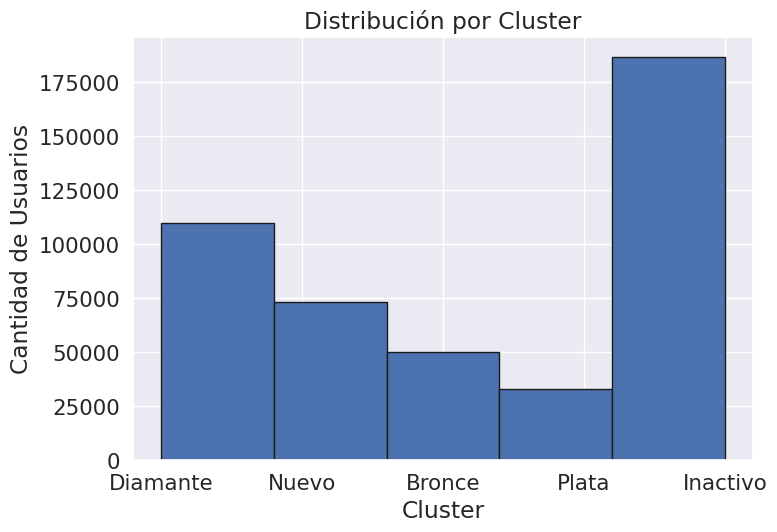

In [35]:
gfrecuencia = df['Cluster']
plt.hist(gfrecuencia, bins=5, edgecolor='k')

plt.xlabel('Cluster')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución por Cluster')

plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Seleccionar las columnas para el análisis
X1 = df_activos[['Frequency', 'Monetary', 'Recency']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

Análisis de Distribución de clusters sobre componentes principales, se puede observar en el gráfico una segmentación marcada entre cada uno de los segmentos.

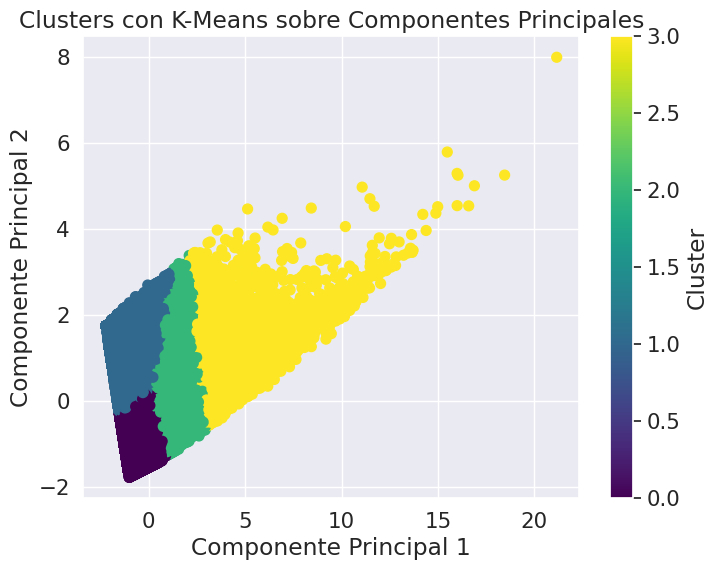

In [37]:
# Crear un DataFrame con los datos reducidos por PCA y las etiquetas de los clusters
df_clusters = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': labels})

# Graficar los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_clusters['PC1'], df_clusters['PC2'], c=df_clusters['Cluster'], cmap='viridis', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters con K-Means sobre Componentes Principales')
plt.colorbar(scatter, label='Cluster')
plt.show()


Finalmente, obtenemos un resumen de los datos por segmento. Estos datos proporcionan información sobre diferentes segmentos de usuarios, incluyendo el número de usuarios, cuán recientes son sus interacciones, con qué frecuencia interactúan y cuál es su valor monetario promedio. Estos detalles son valiosos para la segmentación de clientes y la toma de decisiones comerciales.

In [38]:
Tabla = df.groupby('Cluster').agg({
    'Identificacion': 'nunique',  # Recuento distintivo de usuarios
    'Recency': 'mean',            # Promedio de Recency
    'Frequency': 'mean',          # Promedio de Frequency
    'Monetary': 'mean'           # Promedio de Monetario
}).reset_index()

Tabla.columns = ['Cluster', 'Usuarios', 'Recencia', 'Frecuencia', 'Monetario']
Tabla = Tabla.round(0)
print(Tabla)

    Cluster  Usuarios  Recencia  Frecuencia   Monetario
0    Bronce     50249      17.0         2.0   5623040.0
1  Diamante    109572      10.0         2.0   4612146.0
2  Inactivo    186577      72.0         2.0   2349830.0
3     Nuevo     73306      34.0         2.0   3916137.0
4     Plata     33059      11.0         7.0  11734116.0


## Modelos De Clasificación Supervisados

**K-NN (K-Nearest Neighbors):** Este algoritmo clasifica un punto de datos en función de la mayoría de los puntos de datos cercanos a él. Es especialmente útil para la segmentación basada en similitud.

**Decission Tree (Árbol de Decisión):** Los árboles de decisión dividen los datos en función de reglas de decisión en forma de un árbol. Son fáciles de interpretar y pueden utilizarse para segmentaciones claras basadas en reglas.

**Random Forest (Bosque Aleatorio):** Un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y reducir el sobreajuste. Puede ser útil para una segmentación robusta.

Dividimos el conjunto de datos en dos partes:
1. Evaluaremos los datos de Training y test con los primeros 200.000 registros de nuestro Dataframe.
2. Los 82.000 registros restantes se utilizarán para evaluación de modelo.

In [39]:
df_muestra = df.sample(n=50000, random_state=42)
df_resto = df.drop(df_muestra.index)

In [40]:
df_muestra.head(5)

,DEPARTAMENTO,LOCALIDAD,ESTRATO,GENERO,edad,Identificacion,Recency,Frequency,Monetary,SegmentoNombre,Cluster
40215,MAGDALENA,ARACATACA (MAG),1,Masculino,47.687885,19598017.0,5,1,7105636,5,Bronce
59065,ATLANTICO,GALAPA,1,Femenino,48.188911,22539555.0,18,1,4837736,0,Diamante
42717,ATLANTICO,BARRANQUILLA,1,Femenino,82.584531,22356486.0,10,1,6041856,0,Diamante
335851,ATLANTICO,SAN ESTANISLAO DE KOSTKA,2,Femenino,63.156741,23071158.0,98,1,1800000,3,Inactivo
111452,ATLANTICO,BARRANQUILLA,1,Femenino,52.681724,32766784.0,38,4,10330687,0,Nuevo


In [41]:
from sklearn.model_selection import train_test_split
X = df_muestra[['Recency', 'Frequency', 'Monetary', 'SegmentoNombre']]
y = df_muestra['Cluster']

# Separamos el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Definimos los modelos a evaluar:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

Utilizamos la libreria de pipelines que facilita la experimentación y garantiza resultados reproducibles y coherentes. Cada pipeline encapsula el flujo de trabajo específico de un modelo, lo que facilita la gestión y la iteración en el desarrollo de modelos.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Se crean pipelines para cada modelo
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn_model)
])

tree_pipeline = Pipeline([
    ('tree', tree_model)
])

rf_pipeline = Pipeline([
    ('rf', rf_model)
])

 La selección adecuada de los hiperparámetros es crucial para obtener un rendimiento óptimo de los modelos. Esto implica comprender cómo afectan los hiperparámetros al comportamiento del modelo, realizar búsquedas sistemáticas para encontrar los valores óptimos y adaptar los hiperparámetros a las características específicas del problema.

In [44]:
from sklearn.model_selection import GridSearchCV

# Se definen los hiperparámetros a buscar para cada modelo
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}
param_grid_tree = {
    'tree__max_depth': [3, 5, 7],
    'tree__min_samples_split': [2, 5, 10]
}
param_grid_rf = {
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [None, 5, 10]
}

La búsqueda de hiperparámetros y la validación cruzada son prácticas críticas para desarrollar modelos de aprendizaje automático efectivos y robustos. Ayudan a mejorar el rendimiento, evitar el sobreajuste, optimizar recursos y tomar decisiones basadas en datos al evaluar y seleccionar modelos.

In [45]:
# Se realiza la búsqueda de hiperparámetros y validación cruzada para cada modelo
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='roc_auc')
grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=5, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc')

In [46]:
# Se Ajustan los modelos a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__n_estimators': [100, 125, 150]},
             scoring='roc_auc')

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Función para calcular y registrar las métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')
    return precision, recall, f1, auc

# Evaluar cada modelo
knn_metrics = evaluate_model(grid_search_knn, X_test, y_test)
tree_metrics = evaluate_model(grid_search_tree, X_test, y_test)
rf_metrics = evaluate_model(grid_search_rf, X_test, y_test)

In [48]:
#Registrar resultados
results_df = pd.DataFrame({
    'Modelo': ['K-NN', 'Decision Tree', 'Random Forest'],
    'Precisión': [knn_metrics[0], tree_metrics[0], rf_metrics[0]],
    'Recall': [knn_metrics[1], tree_metrics[1], rf_metrics[1]],
    'F1_Score': [knn_metrics[2], tree_metrics[2], rf_metrics[2]],
    'AUC': [knn_metrics[3], tree_metrics[3], rf_metrics[3]]
})

print(results_df)

          Modelo  Precisión  Recall  F1_Score       AUC
0           K-NN   0.985451  0.9855  0.985444  0.997648
1  Decision Tree   0.850288  0.9070  0.875661  0.971570
2  Random Forest   0.997201  0.9972  0.997198  0.999986


Graficamos los resultados obtenidos para cada modelo:

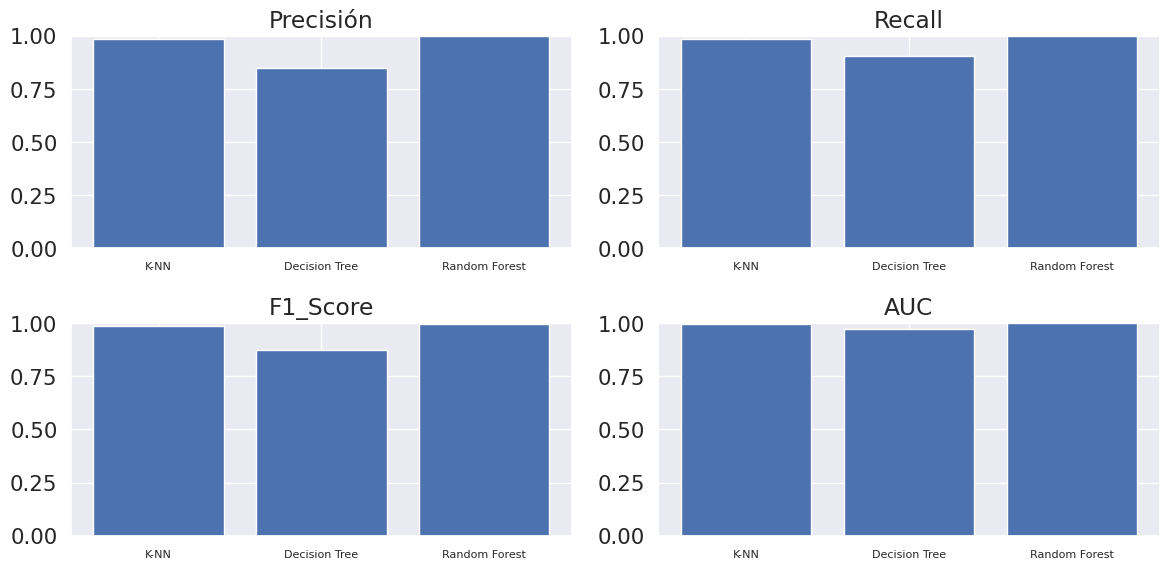

In [49]:
# Graficar las métricas de precisión, recall, F1_Score y AUC
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(2, 2, 1)
plt.bar(results_df['Modelo'], results_df['Precisión'])
plt.title('Precisión')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Recall
plt.subplot(2, 2, 2)
plt.bar(results_df['Modelo'], results_df['Recall'])
plt.title('Recall')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Puntuación F1
plt.subplot(2, 2, 3)
plt.bar(results_df['Modelo'], results_df['F1_Score'])
plt.title('F1_Score')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# AUC
plt.subplot(2, 2, 4)
plt.bar(results_df['Modelo'], results_df['AUC'])
plt.title('AUC')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Como se puede observar K-NN y Random Forest optubieron los mejores puntajes, esto se debe a que son modelos muy ponetentes de clasifiacion, Ademas se ve una gran rendimiento general de cada modelo, lo que puede significar dos cosas, o los modelos estan sobre ajustados, es decir, que aprendieron los datos de mamemoria y cuando se enfrenten a nuevos datos los modelos no tedran un buen rendimiento, o los datos no soy muy complejos por lo que los modelos pueden hallar facilmente una solucion.

Para evitar eso se realizaron validaciones, que es justamente evaluar el modelo con datos nuevos.

Se escoge el mejor modelo, según el AUC:

In [50]:
# Encuentra el mejor modelo según AUC
best_model_name = results_df.loc[results_df['AUC'].idxmax()]['Modelo']
best_model = None

# Encuentra el modelo correspondiente al mejor modelo
if best_model_name == 'K-NN':
    best_model = grid_search_knn.best_estimator_
elif best_model_name == 'Decision Tree':
    best_model = grid_search_tree.best_estimator_
elif best_model_name == 'Random Forest':
    best_model = grid_search_rf.best_estimator_

best_DecisionTree = grid_search_tree.best_estimator_
best_Knn = grid_search_knn.best_estimator_
best_RandomForest = grid_search_rf.best_estimator_

In [51]:
print(best_model)

Pipeline(steps=[('rf', RandomForestClassifier())])


Como se menciono antes Random Forest (rf) es modelo con mayor puntaje AUC y se selecciono con este codigo previo a la validacion para confirmar si este resultado cambia.

## Revisión Con Datos Nuevos

Realizamos validaciones adicionales con un conjunto de datos nuevos, que corresponde a la 2da parte del conjunto de datos que habíamos mencionado al inicio. Se realiza análisis de la curva ROC y la matriz de Confusión para cada uno de los modelos evaluados.

In [52]:
X_new = df_resto[['Recency', 'Frequency', 'Monetary', 'SegmentoNombre']]
y_new = df_resto['Cluster']

Seleccionamos a quellos datos del data frame original que no se ahbian utilizado y definimso nuestro X_new, como estas variables descriptibas y Y_new como las etiquetas de deben predecir.

In [53]:
best_models = [best_DecisionTree, best_Knn, best_RandomForest]
Modelo = ['Decision Tree','K-NN','Random Forest']

results = []
auc_scores = {}

for i, model in enumerate(best_models):
    # Inicializar métricas como None
    precision_new = None
    recall_new = None
    f1_new = None
    auc_new = None

    # Aplicar el modelo al nuevo conjunto de datos
    y_pred_new = model.predict(X_new)

    # Calcular las métricas de precisión
    precision_new = precision_score(y_new, y_pred_new, average='weighted')
    recall_new = recall_score(y_new, y_pred_new, average='weighted')
    f1_new = f1_score(y_new, y_pred_new, average='weighted')

    # Calcular el AUC
    if hasattr(model, 'predict_proba'):
        auc_new = roc_auc_score(y_new, model.predict_proba(X_new), average='weighted', multi_class='ovr')
        auc_scores[Modelo[i]] = auc_new

    # Agrega las métricas al resultado
    results.append({
        'Modelo1': Modelo[i],
        'Precisión': precision_new,
        'Recall': recall_new,
        'F1-Score': f1_new,
        'AUC': auc_new
    })

all_metrics_df = pd.DataFrame(results)

print(all_metrics_df)


         Modelo1  Precisión    Recall  F1-Score       AUC
0  Decision Tree   0.845352  0.903020  0.871029  0.970320
1           K-NN   0.985630  0.985681  0.985637  0.997399
2  Random Forest   0.996959  0.996961  0.996959  0.999987


In [54]:
# Encontrar el mejor modelo basado en AUC
best_model_auc = max(auc_scores, key=auc_scores.get)
best_model_index = Modelo.index(best_model_auc)
best_model = best_models[best_model_index]
best_model

Pipeline(steps=[('rf', RandomForestClassifier())])

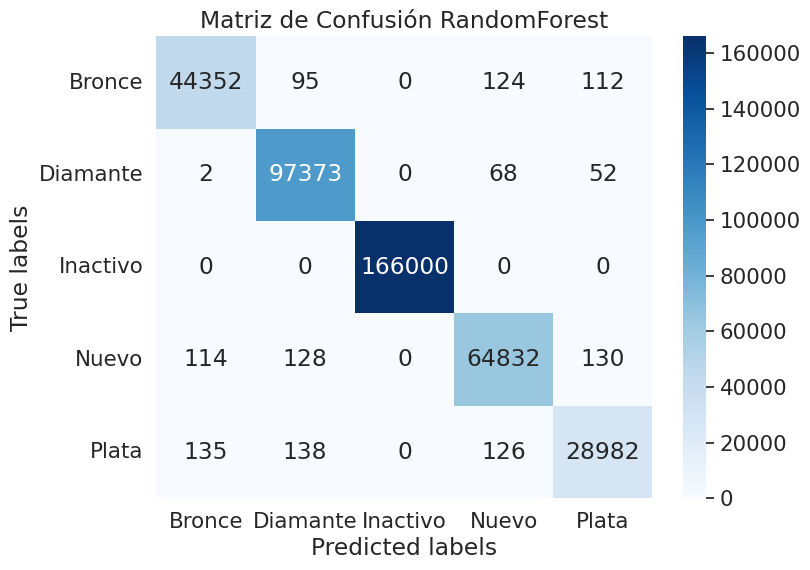


Mejor modelo basado en AUC:
Modelo: Random Forest


In [55]:
conf_matrix = confusion_matrix(y_new, best_model.predict(X_new))

class_labels = best_model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión RandomForest')
plt.show()

print("\nMejor modelo basado en AUC:")
print(f"Modelo: {best_model_auc}")

Obtenemos los resultados de los modelos entrenados con los primeros datos y ahora validados con los nuevos datos. Vemos como los puntajes son muy parecidos a a los anteriores pero nada que resulte significante, por lo que es poco probable que los modelos esten sobre ajustados y mucho más logico que las variables no soy muy complejas, por lo que los modelos logran predecir con exito la gran parte de las etiquetas.

## Resultados
Describiremos un poco el rendimiento general de los modelos para esto utilizamos las grafica de Matriz de confusión la cual tiene en el eje verticar las etiquetas reales del cliente y en el eje horizontal las etiquetas predichas por el modelo.
* Matriz de confusión Modelo Random forest:
El modelo predijo en un 99,9% las etiquetas de forma correcta, demostrando que es mucho mejor que el modelo de Arbol de decicion y el modelo KNN comprendiendo claramente de que este modelo es mucho más complejo.
* Decision Tree:
Precisión (Accuracy): El 84.6% de las predicciones fueron correctas.
Recall: El modelo identifica correctamente el 90.3% de todas las instancias positivas.
F1-Score: La precisión y la exhaustividad del modelo con un 87%
AUC (Area Under Curve): Es una métrica de la curva ROC y mide la capacidad del modelo para distinguir entre clases positivas y negativas. con un 97% se identifica un buen rendimiento en la clasificación.
* KNN:
Precisión: El 98.6% de las predicciones fueron correctas, lo cual es bastante alto.
Recall: El modelo identifica correctamente el 98.6% de todas las instancias positivas.
F1-Score: Al igual que en el caso del Decision Tree, un F1-Score alto indica un buen equilibrio entre precisión y recall.
AUC: El modelo tiene una excelente capacidad para distinguir entre clases.
* Random Forest:
Precisión: El 99.7% de las predicciones fueron correctas, lo cual es extremadamente alto.
Recall: El modelo identifica correctamente el 99.7% de todas las instancias positivas.
F1-Score: Indica un buen equilibrio entre precisión y recall con un 99.7%.
AUC: El modelo tiene una excelente capacidad para distinguir entre clases.


Todos los modelos parecen tener un rendimiento bastante bueno, con altas precisiones, recalls y F1-Scores.
El modelo Random Forest es el que muestra las métricas más altas en todas las categorías, seguido de cerca por K-NN.

## Predicción:

Con el modelo de Random Forest ejecutado, se procede a realizar la predicción agregando los valores predichos en el nuevo dataset.

In [56]:
X_new['Predictions'] = y_pred_new
X_new

,Recency,Frequency,Monetary,SegmentoNombre,Predictions
0,11,1,152900,1,Diamante
1,22,3,476300,3,Nuevo
2,34,3,420000,3,Nuevo
3,39,3,476300,3,Nuevo
4,11,1,288900,0,Diamante
...,...,...,...,...,...
452758,51,1,3469997,3,Inactivo
452759,51,1,2370000,0,Inactivo
452760,59,1,1156177,3,Inactivo
452761,57,1,3600970,0,Inactivo


In [57]:
X_new.groupby('Predictions').mean()

,Recency,Frequency,Monetary,SegmentoNombre
Predictions,,,,
Bronce,16.642378,1.955429,5.625712e+06,4.098917
Diamante,10.481143,1.828074,4.620243e+06,0.294340
Inactivo,72.255976,1.577765,2.350653e+06,2.292373
Nuevo,34.394597,1.950115,3.919116e+06,1.511635
Plata,11.035080,7.169934,1.172868e+07,0.694801


## Exportar Modelo

In [58]:
from joblib import dump, load
# Guardar el modelo
dump(best_model, 'ModeloClasificacion.joblib')

['ModeloClasificacion.joblib']

In [59]:
!pip install dash
import dash
from dash import dcc, html
!pip install dash-bootstrap-components
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State
import joblib
import pandas as pd

# Cargar el modelo previamente entrenado
# model = joblib.load('C:/Users/Andres/Downloads/pickle_model.pkl')
model = joblib.load('ModeloClasificacion.joblib')

# Crear la aplicación Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Diseño de la aplicación
app.layout = html.Div([
    html.H1("Predicción de Cluster con Machine Learning"),
    dcc.Input(id='input-recency', type='number', placeholder='Recency'),
    dcc.Input(id='input-frequency', type='number', placeholder='Frequency'),
    dcc.Input(id='input-monetary', type='number', placeholder='Monetary'),
    dcc.Input(id='input-segmentonombre', type='number', placeholder='SegmentoNombre'),
    html.Button('Predict', id='submit-val', n_clicks=0),
    html.Div(id='output')
])

# Callback para actualizar la salida basada en los inputs
@app.callback(
    Output('output', 'children'),
    [Input('submit-val', 'n_clicks')],
    [State('input-recency', 'value'),
     State('input-frequency', 'value'),
     State('input-monetary', 'value'),
     State('input-segmentonombre', 'value')]
)
def update_output(n_clicks, recency, frequency, monetary, segmentonombre):
    if n_clicks is not None and n_clicks > 0:
        # Crear un DataFrame con los datos de entrada
        data = {
            'Recency': [recency],
            'Frequency': [frequency],
            'Monetary': [monetary],
            'SegmentoNombre': [segmentonombre]
        }
        df = pd.DataFrame(data)

        # Realizar la predicción del cluster
        prediction = model.predict(df)[0]

        return f"El Cluster predicho es: {prediction}"
    else:
        return "Ingrese los datos y haga clic en 'Predict'"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 4.0 MB/s eta 0:00:00


Ejecutamos el modelo en el API.

In [60]:
# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [61]:
import pickle
with open('modelo.pkl','wb') as archivo:
    pickle.dump(best_model, archivo)

In [62]:
# Cargar el modelo previamente entrenado
model = joblib.load('modelo.pkl')

# Crear la aplicación Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Diseño de la aplicación
app.layout = html.Div([
    html.H1("Predicción de Cluster con Machine Learning"),
    dcc.Input(id='input-recency', type='number', placeholder='Recency'),
    dcc.Input(id='input-frequency', type='number', placeholder='Frequency'),
    dcc.Input(id='input-monetary', type='number', placeholder='Monetary'),
    dcc.Input(id='input-segmentonombre', type='number', placeholder='SegmentoNombre'),
    html.Button('Predict', id='submit-val', n_clicks=0),
    html.Div(id='output')
])

# Callback para actualizar la salida basada en los inputs
@app.callback(
    Output('output', 'children'),
    [Input('submit-val', 'n_clicks')],
    [State('input-recency', 'value'),
     State('input-frequency', 'value'),
     State('input-monetary', 'value'),
     State('input-segmentonombre', 'value')]
)
def update_output(n_clicks, recency, frequency, monetary, segmentonombre):
    if n_clicks is not None and n_clicks > 0:
        # Crear un DataFrame con los datos de entrada
        data = {
            'Recency': [recency],
            'Frequency': [frequency],
            'Monetary': [monetary],
            'SegmentoNombre': [segmentonombre]
        }
        df = pd.DataFrame(data)

        # Realizar la predicción del cluster
        prediction = model.predict(df)[0]

        return f"El Cluster predicho es: {prediction}"
    else:
        return "Ingrese los datos y haga clic en 'Predict'"

In [63]:
# Ejecutar la aplicación
if __name__ == '_main_':
    app.run_server(debug=True)